# **ANÁLISIS DE VIVIENDA EN MELBOURNE (AUSTRALIA)**  <br>





El presente trabajo se basa del dataset del siguiente link de Kaggle: <br>
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

Dicho dataset cuanta con 21 columnas y 34858 filas (incluyendo los títulos), entre lo que podemos destacar: <br>



* Suburb: Suburbio
* Address: Dirección
* Rooms: Númeroro de habitaciones
* Type: Tipo de viviendas (Ej. habitaciones, casa, etc)
* Price: Precio en Dolares Australianos
* Method: Método de adquisición (Propiedad vendida, propiedad transferida, etc)
* SellerG: Vendedor (Real State Agent)
* Date: Fecha de venta
* Distance Distancia del centro (CBD) en km.
* Postcode: Codigo Postal
* Bedroom2: Número de dormitorios (Sin contar la habitación principal)
* Bathroom: Número de baños
* Car: Nro de sitios de parqueo
* Landsize: Área del terreno (m2)
* BuildingArea: Área contruida (m2)
* YearBuilt: Año de construcción
* CouncilArea: Governing council for the area
* Lattitude: Latitud
* Longtitude: Longitud
* Regionname: Región donde se ubica
* Propertycount: Número de propiedades que exiten en ese suburbio

**Las definiciones se pueden obtener del dataset origen**

### **Hipótesis**






Existe una relación directa entre el terreno de la vivienda (m2) y el precio.

### **Objetivo**


Poder predecir el valor de venta de una propiedad de Melbourne, incluyedo el soporte de Herramientas de Machine Learning.

### **Útilidad**

El presente trabajo permitirá determinar un valor de las propiedad en Melburne.

#### **Público Objetivo**

*   Toda persona o entidad de Melbourne que desee hipotecar su vivienda.*1
*   Toda persona o entidad de Melbourne que desea comprar o vender una vivienda.*1

*1 Todos los análisis se marcan dentro de las limitantes mencionadas en el siguiente subtítulo.




#### **Limitantes**

*   El presente trabajo se límita a estudiar el valor de las viviendas de Melbourne - Australia, con datos hasta Agosto del 2018. (Dataset created by Tony Pino - https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market).
*   El trabajo de Machine Learning comprenderá a partir de los 9km de distancia del Centro de la ciudad y las regiones de Western Victoria, Eastern Victoria y Northern Metropolitan; ello se justificará y detallará más adelante.
*   Con datos actuales (manteniendo la estructura), se puede actualizar el modelo para brindar las estimaciones más precisas.



# **ANÁLISIS EXPLORATORIO**

### **Preparativos e importación de datos**

In [1]:
# Empiezo importando las librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import timeit
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from numpy import random
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from scipy import stats

In [2]:
#Importo el archivo (Debe estar en el mismo directorio que este archivo Python):
melb_df = pd.read_csv("Melbourne_housing_FULL.csv")

#Verifico la importación
melb_df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
#Obtengo los encabezados (para poder guiarme más facilmente)
for column in melb_df:
  print(column)

Suburb
Address
Rooms
Type
Price
Method
SellerG
Date
Distance
Postcode
Bedroom2
Bathroom
Car
Landsize
BuildingArea
YearBuilt
CouncilArea
Lattitude
Longtitude
Regionname
Propertycount


In [4]:
#Verifico la candidad de filas
Nro_datos_inicial = len(melb_df)
Nro_datos_inicial

34857

#### **Dataset limpio**

Se hará la limpieza de datos y este lo llamaremos Dataset limpio.

In [5]:
# Primera limpieza (Eliminación de filas que no tengan los datos de "Landsize" y "Price" y/o seán menor a 0):
melb_df2 = melb_df.loc[(melb_df['Landsize'] > 0) & (melb_df['Price'] > 0)]

# Limpieza de propiedadesd duplicadas (misma Region, suburbio, direccion y coordenadas)
#Creo la columna duplicado con estas caracteristicas
melb_df2['Duplicado'] = melb_df2.duplicated(subset=['Regionname', 'Suburb', 'Address'])
#Elimino los duplicados (duplicado=True)
melb_df2 = melb_df2.loc[melb_df2['Duplicado'] != True]
#Elimino la columna duplicado, ya no lo usaré
melb_df2.drop(columns=['Duplicado'], inplace=True)
#Desactivo los avisos de la función duplicated
pd.options.mode.copy_on_write = True


#Verifico la cantidad de datos que me quedan
Nro_datos_limpieza = len(melb_df2)

#Calculo el porcentaje de datos a trabajar (respecto al Dataset original)
Porc_datos = Nro_datos_limpieza / Nro_datos_inicial *100
Porc_datos = round(Porc_datos, 2)

#E imprimo los resultados
print(f'Quedan {Nro_datos_limpieza} datos, lo que corresponde al {Porc_datos}% del Dataset')

Quedan 15888 datos, lo que corresponde al 45.58% del Dataset


<ipython-input-5-44826f5ac976>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df2['Duplicado'] = melb_df2.duplicated(subset=['Regionname', 'Suburb', 'Address'])


In [6]:
#resumen del DF
melb_df2.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  15888.000000  1.588800e+04  15888.000000  15888.000000  15882.000000   
mean       3.180073  1.149327e+06     11.709844   3112.705564      3.161063   
std        0.881177  6.602948e+05      6.740845    114.144295      0.897281   
min        1.000000  1.310000e+05      0.000000   3000.000000      0.000000   
25%        3.000000  7.100000e+05      7.200000   3044.000000      3.000000   
50%        3.000000  9.680000e+05     10.800000   3084.000000      3.000000   
75%        4.000000  1.400000e+06     14.300000   3150.000000      4.000000   
max       12.000000  1.120000e+07     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  15879.000000  15608.000000   15888.000000   8227.000000  9227.000000   
mean       1.621828      1.768196     666.364048    165.764159  1963.499946   
std        0.712478      1.016344    3990.939647    508.469557    37.721084   
min        0.000000      0.000000       1.000000      0.000000  1196.000000   
25%        1.000000      1.000000     301.750000    108.000000  1940.000000   
50%        2.000000      2.000000     553.000000    139.000000  1970.000000   
75%        2.000000      2.000000     683.250000    188.000000  1997.000000   
max        9.000000     18.000000  433014.000000  44515.000000  2019.000000   

          Lattitude    Longtitude  Propertycount  
count  15869.000000  15869.000000   15888.000000  
mean     -37.804286    144.997139    7381.358573  
std        0.092555      0.122582    4410.545866  
min      -38.190430    144.423790      83.000000  
25%      -37.860000    144.920480    4217.000000  
50%      -37.795600    145.005390    6482.000000  
75%      -37.743730    145.073300   10175.000000  
max      -37.399460    145.526350   21650.000000

Observando los cuartiles, se puede evidenciar que existe al menos un outlier en nro de cuartos (q75%: 4 y max 10)

### **Comparaciones iniciales**

In [7]:
#Cantidad de viviendas por Región
#Resumen
pd.value_counts(melb_df2['Regionname'])

Regionname
Northern Metropolitan         4542
Southern Metropolitan         4526
Western Metropolitan          3684
Eastern Metropolitan          2080
South-Eastern Metropolitan     780
Eastern Victoria               105
Northern Victoria              105
Western Victoria                66
Name: count, dtype: int64

In [8]:
#Creo el resumen en DF con el Porcentaje

#Creo listas vacias
Regionname = []
Count_region = []
Porcentaje = []

#Itero por cada elemento unico de "Regionname" y añado el nombre, la cantidad y el porcentaje de esa region en su respectiva lista
for i in melb_df2['Regionname'].unique():
  Regionname.append(i)
  Count_region.append(melb_df2['Regionname'].loc[melb_df2['Regionname'] == i].count())
  #Para el porcentaje hago el calculo y luego lo formateo
  Porc_temp = Count_region[-1] / melb_df2['Regionname'].count()
  Porcentaje.append(round(Porc_temp*100,1))


#Creo el DF a partir de las listas vacios
Nro_viviendas_region = pd.DataFrame(
    list(zip(Regionname, Count_region, Porcentaje)),
    columns = ['Región', 'Count', 'Porcentaje']
    )

#Limpio la fila con reión null y count 0:
Nro_viviendas_region = Nro_viviendas_region.loc[Nro_viviendas_region['Count'] > 0]

#Ordeno según conteo
Nro_viviendas_region = Nro_viviendas_region.sort_values(by='Count', ascending=False)

#Muestro el resultado
Nro_viviendas_region.reset_index(drop=True)


Región  Count  Porcentaje
0       Northern Metropolitan   4542        28.6
1       Southern Metropolitan   4526        28.5
2        Western Metropolitan   3684        23.2
3        Eastern Metropolitan   2080        13.1
4  South-Eastern Metropolitan    780         4.9
5            Eastern Victoria    105         0.7
6           Northern Victoria    105         0.7
7            Western Victoria     66         0.4

Text(0.5, 1.0, 'Piechart de distribucion viviendas por Región')

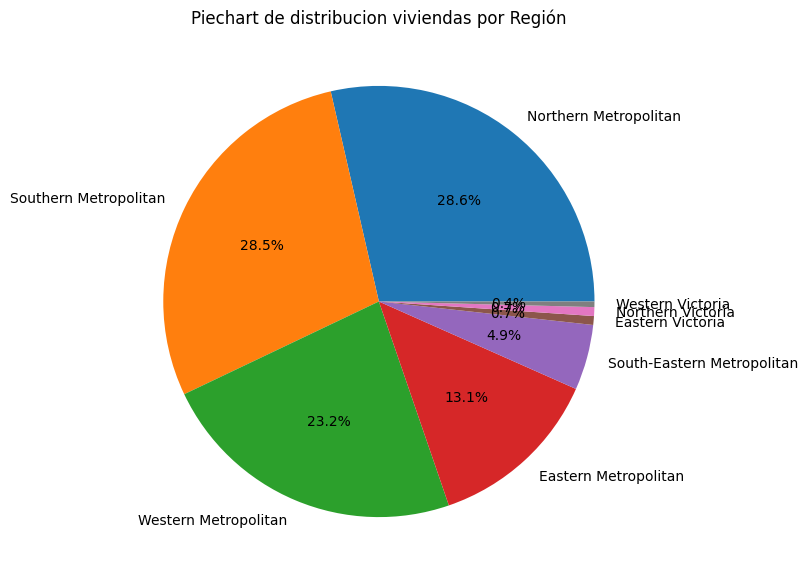

In [9]:
#Gráfico el DF resumen de cantidad de viviendas por Región (En Matplotlib)
Conteo_region = pd.value_counts(melb_df2['Regionname'])

fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(Conteo_region, labels = Conteo_region.index, autopct='%1.1f%%')
plt.title('Piechart de distribucion viviendas por Región')



In [10]:
#Crearé el grafico con Plotly para tener el gráfico más limpio
import plotly.express as px
Viviendas_region = melb_df2['Regionname'].value_counts()
fig = px.pie(values=Viviendas_region,
             title="Piechart de distribucion viviendas por Región",
             names=Viviendas_region.index)
fig.update_traces(textinfo='percent+label')

Se puede observar que las regiones con más viviendas son Northern Metropolitan, Southern Metropolitan, Wester Metropolitan con 28.6%, 28.5% y 23.2% respectivamente.

### **Análisis Precio**

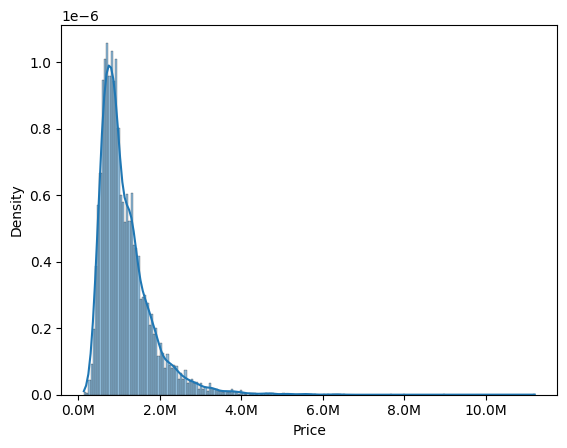

In [11]:
#Grafico de distribución con Seaborn (Precios):
sns.histplot(melb_df2, x="Price", stat='density', kde="True", legend=True)
# Ajustar la escala del eje x
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Mostrar el gráfico
plt.show()

In [12]:
#Creo un resumen estadistico de los precios
Estadistica_precio = melb_df2['Price'].describe()
#Lo escalo a millones y lo imprimo
Estadistica_precio_millones = Estadistica_precio/1e6
print(f'{Estadistica_precio_millones} \n *Valores expresados en Millones')

count     0.015888
mean      1.149327
std       0.660295
min       0.131000
25%       0.710000
50%       0.968000
75%       1.400000
max      11.200000
Name: Price, dtype: float64 
 *Valores expresados en Millones


Se puede observar que la mayor de precios oscila al rededor del millon de AUD y pocos llegan a los 2 millones AUD. Sin embargo hay muy pocos precios (posibles outliers) q superan el millon de AUD.

### **Análisis precio vs terreno**

In [13]:
#Haremos un resumen estadístico de Landsize:
melb_df2['Landsize'].describe()

count     15888.000000
mean        666.364048
std        3990.939647
min           1.000000
25%         301.750000
50%         553.000000
75%         683.250000
max      433014.000000
Name: Landsize, dtype: float64

In [14]:
#No puede existir un terreno de 0 m2, por lo cual los consideraré outliers.
#Considero ventas a partir de 4m2
melb_df2 = melb_df2.loc[melb_df2['Landsize'] >= 4]

#Y compruebo las nuevas estadísticas de Landsize:
melb_df2['Landsize'].describe()

count     15884.000000
mean        666.531415
std        3991.428219
min           5.000000
25%         302.000000
50%         553.000000
75%         684.000000
max      433014.000000
Name: Landsize, dtype: float64

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

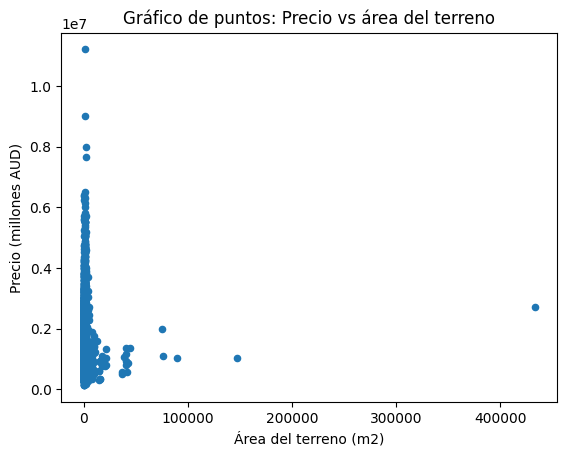

In [15]:
#Para comprobar la hipótesis, graficaremos el precio vs el área del terreno.
melb_df2.plot.scatter(x='Landsize', y='Price')

#Y la etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

Se comprueba un outlier donde el terreno es mayor a 400000m2 y el precio esta al rededor de los 3 millones de AUD. Por tanto, crearemos un nuevo data frame donde iremos eliminando estos outliers.

In [16]:
#Creación de un nuevo DF donde el terreno no exceda los 100000m2 (Solo el outlier mencionado no cumple esta condición)
melb_df2 = melb_df2.loc[melb_df2['Landsize'] < 400000]

#Y muestro el nuevo resumen estadístico
melb_df2['Landsize'].describe()

count     15883.000000
mean        639.310647
std        2040.144576
min           5.000000
25%         302.000000
50%         553.000000
75%         683.500000
max      146699.000000
Name: Landsize, dtype: float64

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

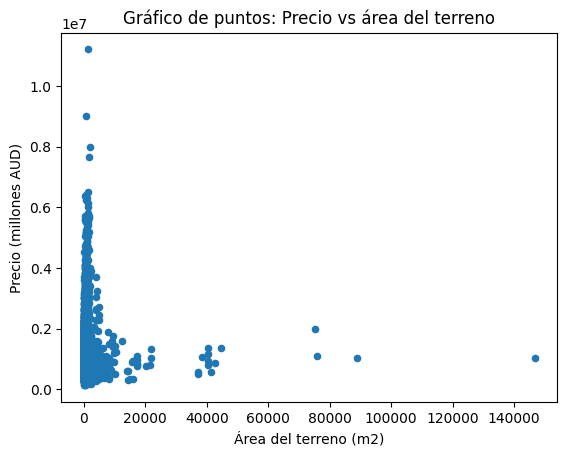

In [17]:
#Para comprobar la hipótesis, graficaremos el precio vs el área del terreno.
melb_df2.plot.scatter(x='Landsize', y='Price')

#Y la etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

Text(0.5, 1.0, 'Gráfico de puntos: Precio vs área del terreno')

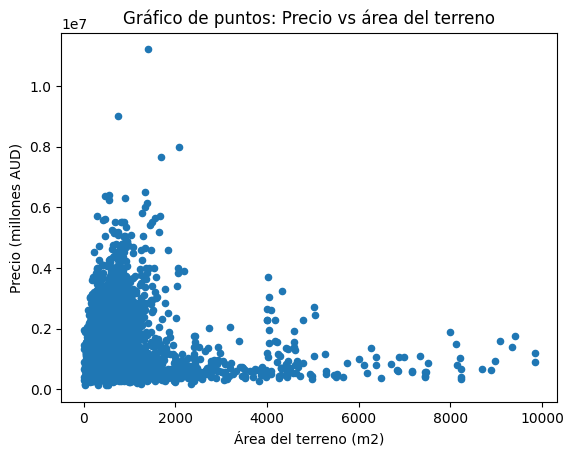

In [18]:
#Se siguen observando Outliers. Por tanto, limpiaremos los datos con Landsize menor a 10000 m2
melb_df2 = melb_df2.loc[melb_df2['Landsize'] < 10000]

#Y repetiremos el gráfico con el DF nuevo:
melb_df2.plot.scatter(x='Landsize', y='Price')
#E imprimimos las etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

In [19]:
#Verifico que la cantidad de datos que me quedan sean significativas:
Nro_datos_actual = len(melb_df2)

#Calculo el porcentaje de datos a trabajar (respecto al Dataset original)
Porc_datos = Nro_datos_actual / Nro_datos_limpieza *100
Porc_datos = round(Porc_datos, 2)

#E imprimo los resultados
print(f'Quedan {Nro_datos_actual} datos, lo que corresponde al {Porc_datos}% del Dataset limpio')

Quedan 15848 datos, lo que corresponde al 99.75% del Dataset limpio


Se observa que no hay relación entre el precio y el área del terreno.
Por tanto, la hipótesis inicial es falsa. <br>
Sin embargo, se continuará explorando y dividiendo en más variables para poder determinar si existe una relación entre ellas.

### **Análisis precio vs terreno respecto a la región**

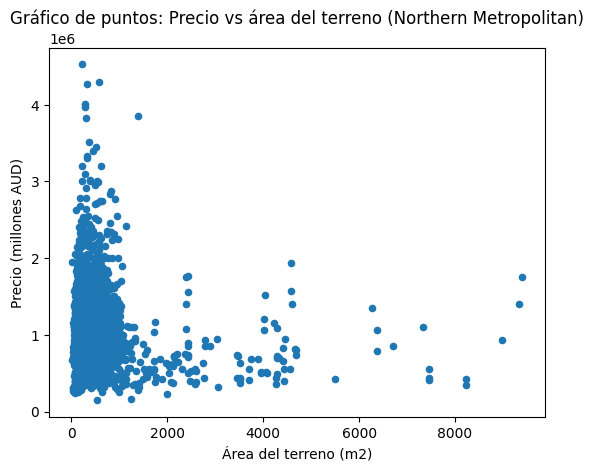

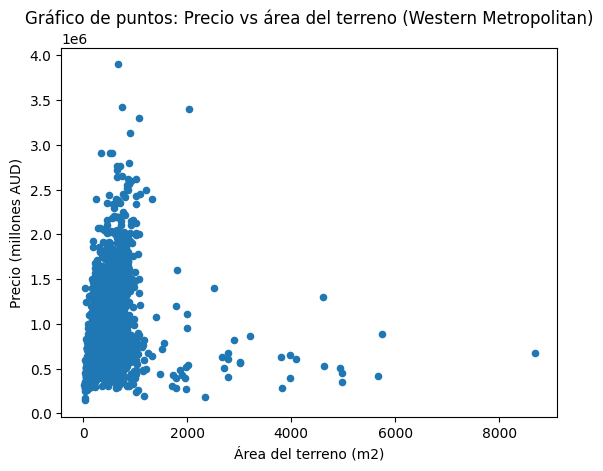

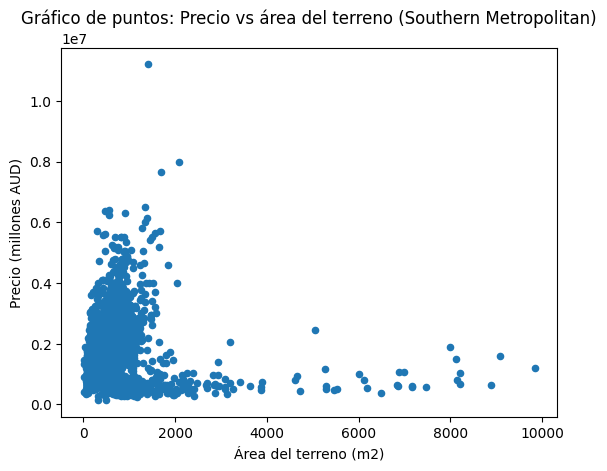

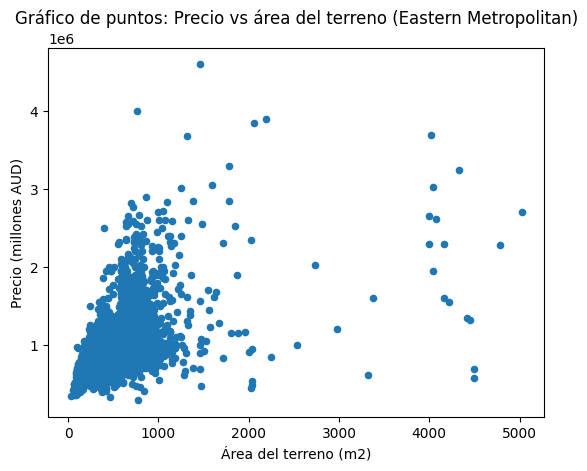

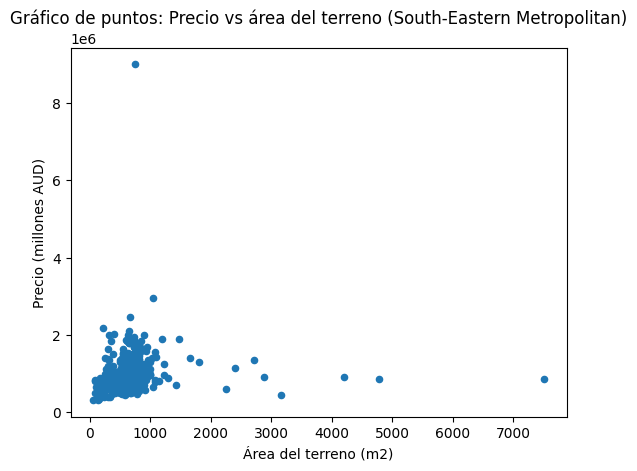

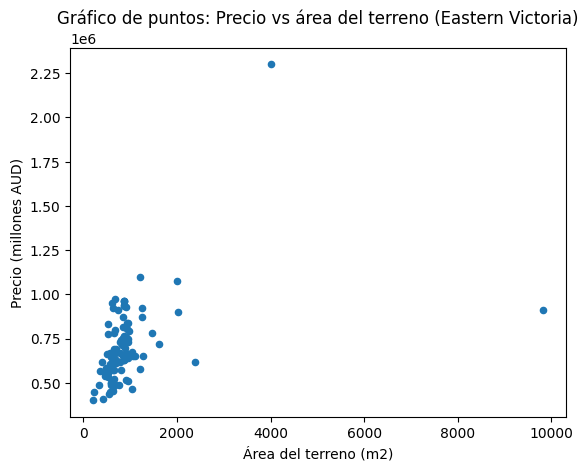

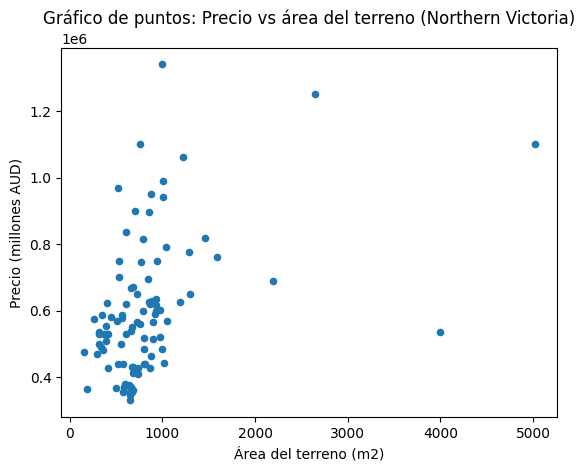

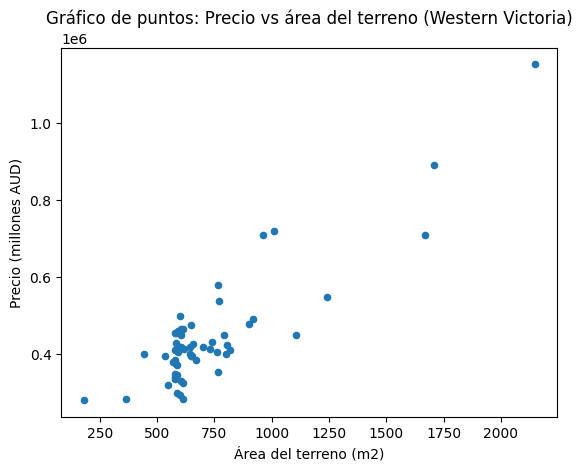

In [20]:
#Haremos el gráfico anterior, pero ahora por Región
#Creare el gráfico itirando sobre Regionmame:
for i in melb_df2['Regionname'].unique():
  #Creo el DF filtrando la Region
  x =  melb_df2.loc[melb_df2['Regionname'] == i]
  #Y Gráfico ese DF Filtro
  x.plot.scatter(x='Landsize', y='Price')

  #Y la etiquetas
  plt.xlabel('Área del terreno (m2)')
  plt.ylabel('Precio (millones AUD)')
  plt.title(f'Gráfico de puntos: Precio vs área del terreno ({i})')

Algunas regiones tienen mejor relación Área con Precio, pero sigue sin ser una condición que se cumpla en todos los escenarios.

### **Análisis precio vs terreno respecto a la región y distancia CBD (Km)**

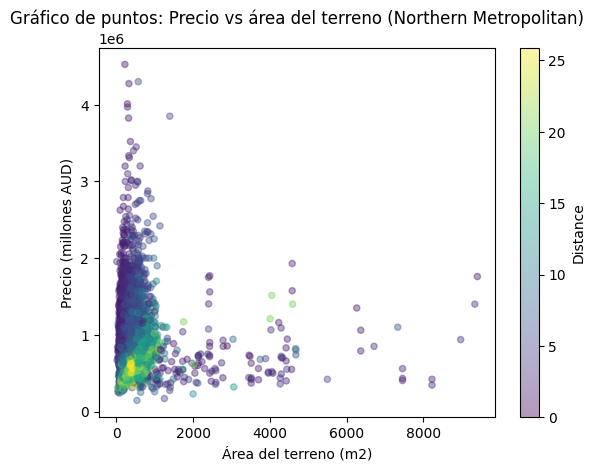

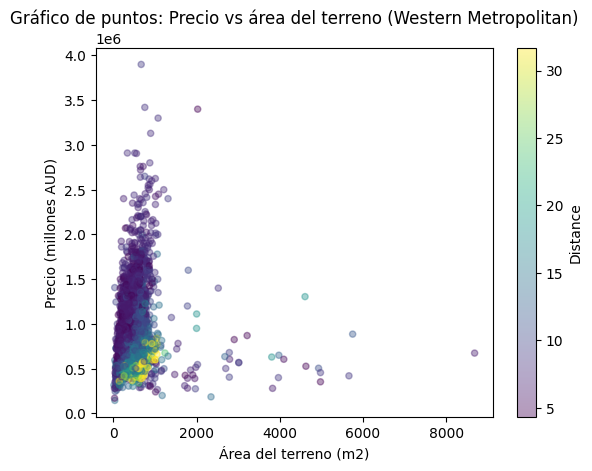

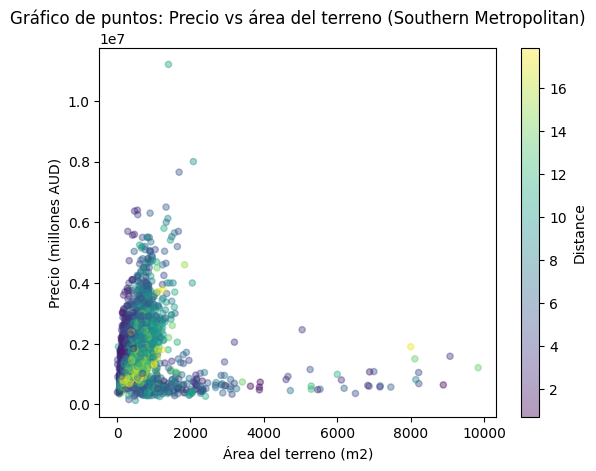

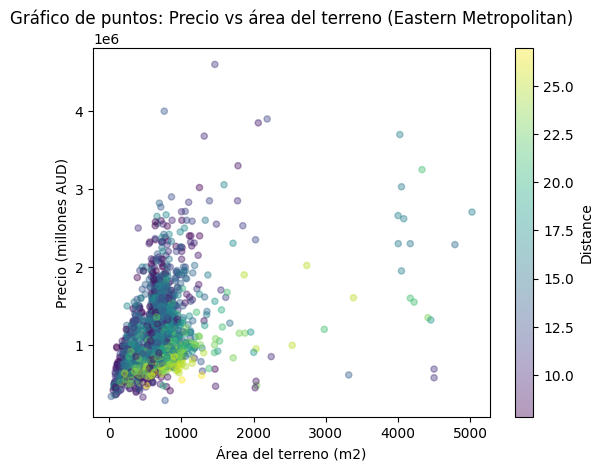

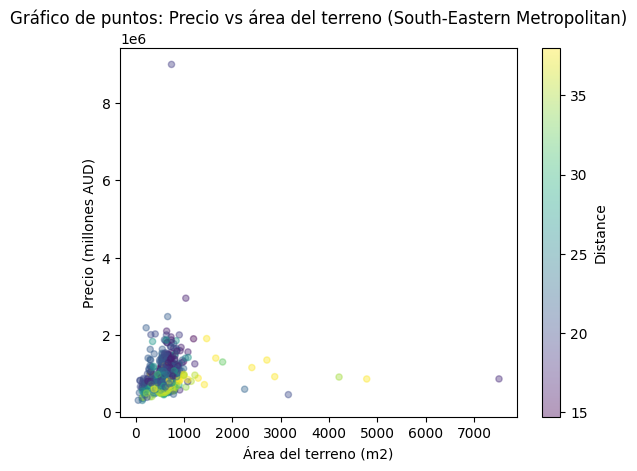

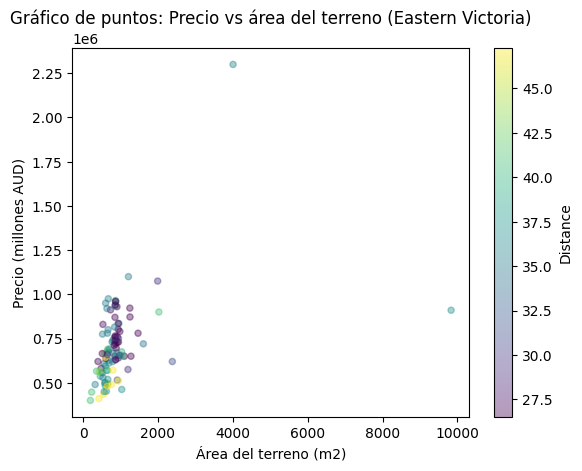

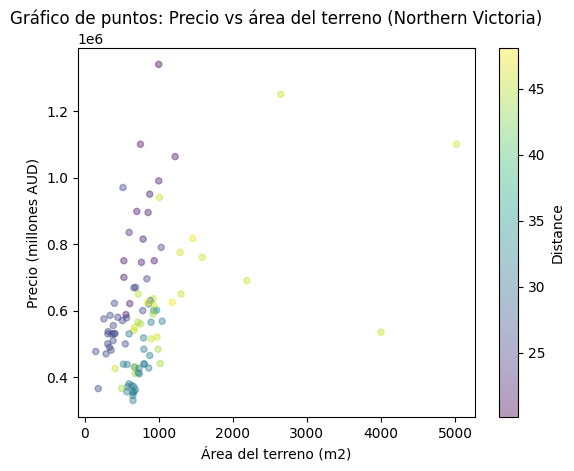

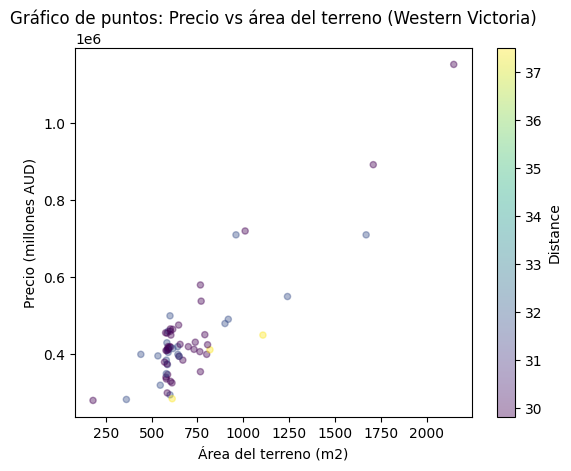

In [21]:
#Haremos el gráfico anterior, pero ahora distinguiremos la visualización por distancia del CDB (mediante colores).

#Creare el gráfico itirando sobre Regionmame:
for i in melb_df2['Regionname'].unique():
  #Creo el DF filtrando la Region
  x =  melb_df2.loc[melb_df2['Regionname'] == i]
  #Y Gráfico ese DF Filtro, incluyendo color por distancia y opacidad al 40% para distinguir los puntos
  x.plot.scatter(x='Landsize', y='Price', c="Distance", alpha=0.4)

  #Y las etiquetas
  plt.xlabel('Área del terreno (m2)')
  plt.ylabel('Precio (millones AUD)')
  plt.title(f'Gráfico de puntos: Precio vs área del terreno ({i})')

Aún con los filtros de Región y distancia del CDB no se ve una relación clara entre precio y Área del terreno.

### **Gráficos para corroborar la relación**

#### Heatmap de correlación

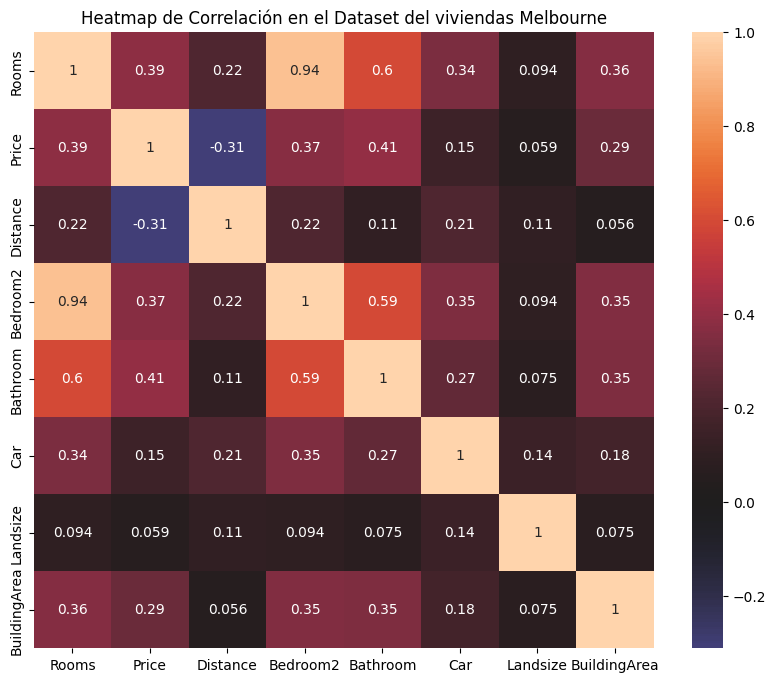

In [22]:
# Heatmap de correlación

#Creo la matriz de correlación con las variables deseadas
corrmat = melb_df2[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].corr()

#Y creo ek Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Establecer el título del gráfico
plt.title("Heatmap de Correlación en el Dataset del viviendas Melbourne")

# Mostrar el gráfico
plt.show()

Las relaciones más fuertes son de Habitaciones secundarias con número de cuartos y distancia con número de baños, sin embargo no son relaciones interesantes para analizar. <br>
Por otro lado se encuentra una relación regular de área contruida con distancia del CDB.


#### Gráfico de cajas

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

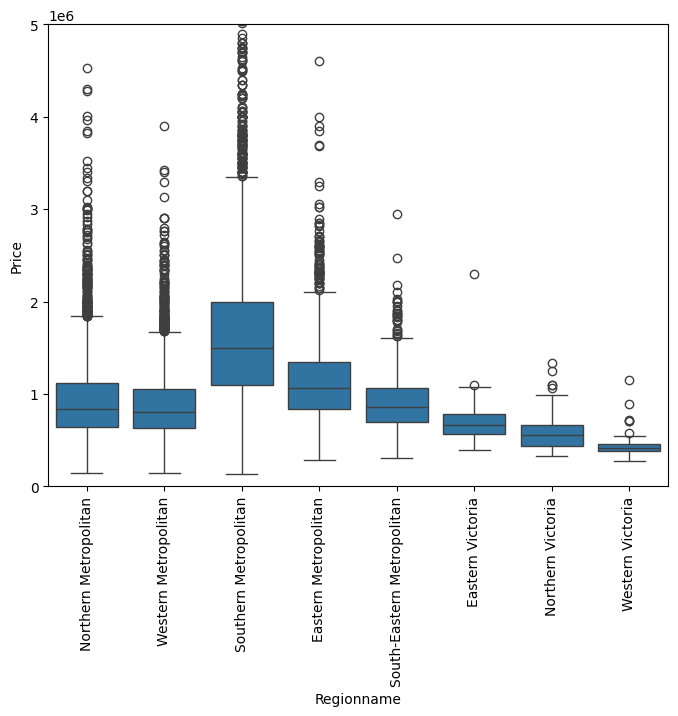

In [23]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Regionname', y ="Price", data = melb_df2)
fig.axis(ymin=0, ymax=5000000)
plt.xticks(rotation = 90)

Se puede observar que efectivamente, en cada región los precios tienen muchos outliers. Por tanto, El precio y la región no se relacionan directamente por si solos.

### **2do Análisis precio vs terreno respecto a la región y distancia CBD (Km) - Gráficos individuales**

#### Rangos distancia

En este caso dividiré las distancias en rangos de 3km desde CBD. Acto seguido, los agruparé según dicho rango.

In [24]:
# Creo la lista con todas las distancias
Distancias = melb_df2['Distance'].unique()
print(f'La distancia mínima es {Distancias.min()}, y la máxima es {Distancias.max()}')

La distancia mínima es 0.0, y la máxima es 48.1


In [25]:
# Crear los bins de 3 en 3 y las etiquetas para los rangos
bins_rango = range(math.floor(Distancias.min()), int(melb_df2['Distance'].max()) + 3, 3)
labels_rango = [f'{i}-{i+3}' for i in bins_rango[:-1]]

# Crear una nueva columna 'DistanceRange' usando pd.cut
melb_df2['DistanceRange'] = pd.cut(melb_df2['Distance'], bins=bins_rango, labels=labels_rango, right=False)

#Ordeno el DF por Región y luego Distancia para asegurar que los gráficos salgan en la secuencia ordenada
melb_df2_ordenado = melb_df2.sort_values(by=['Regionname', 'Distance'])
#Y reinicio el indice
melb_df2_ordenado = melb_df2_ordenado.reset_index(drop=True)

# Verifico la nueva columna
melb_df2_ordenado.head()

Suburb            Address  Rooms Type      Price Method SellerG  \
0       Ivanhoe  29 Livingstone St      4    h  1350000.0     PI  Nelson   
1       Ivanhoe   1/12 Thoresby Gr      3    h  1300000.0     PI  Nelson   
2  Ivanhoe East       6 Oakdene Pl      3    h  2525000.0     VB   Miles   
3  Ivanhoe East      12 Wilfred Rd      2    h  1853000.0      S     Ray   
4       Ivanhoe   11 Athelstane Gr      4    h  2380000.0      S  Jellis   

         Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  \
0   3/06/2017       7.8    3079.0  ...  2.0     587.0           NaN   
1   3/06/2017       7.8    3079.0  ...  2.0     334.0         128.0   
2   3/06/2017       7.8    3079.0  ...  1.0     805.0         261.0   
3  17/06/2017       7.8    3079.0  ...  2.0     751.0           NaN   
4  24/06/2017       7.8    3079.0  ...  2.0     778.0           NaN   

   YearBuilt           CouncilArea  Lattitude Longtitude  \
0        NaN  Banyule City Council  -37.76737  145.03944   
1     2005.0  Banyule City Council  -37.76538  145.04964   
2     1930.0  Banyule City Council  -37.77140  145.05963   
3        NaN  Banyule City Council  -37.77521  145.05426   
4        NaN  Banyule City Council  -37.76356  145.04135   

             Regionname  Propertycount DistanceRange  
0  Eastern Metropolitan         5549.0           6-9  
1  Eastern Metropolitan         5549.0           6-9  
2  Eastern Metropolitan         1554.0           6-9  
3  Eastern Metropolitan         1554.0           6-9  
4  Eastern Metropolitan         5549.0           6-9  

[5 rows x 22 columns]

#### Gráfico

In [26]:
#Ordeno y separo las filas y columnas necesarias:
melb_temp = melb_df2_ordenado.sort_values(by='Distance')
filas = melb_temp['DistanceRange'].unique()

columnas = melb_df2_ordenado['Regionname'].unique()

#Convierto las filas y columnas a listas
filas = filas.tolist()
columnas = columnas.tolist()

#Elimino los valores nulos
filas = [i for i in filas if not (isinstance(i, float) and math.isnan(i))]
columnas = [i for i in columnas if not (isinstance(i, float) and math.isnan(i))]

#Calculo la cantidad de filas y columnas para hacer los subgraficos:
Nro_filas = len(filas)
Nro_columnas = len(columnas)

#Creo un DF temporal con las columnas que utilizaré para optimizar
df_temp = melb_df2_ordenado[['Regionname', 'DistanceRange', 'Landsize', 'Price']]

<ipython-input-27-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned

<ipython-input-27-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned



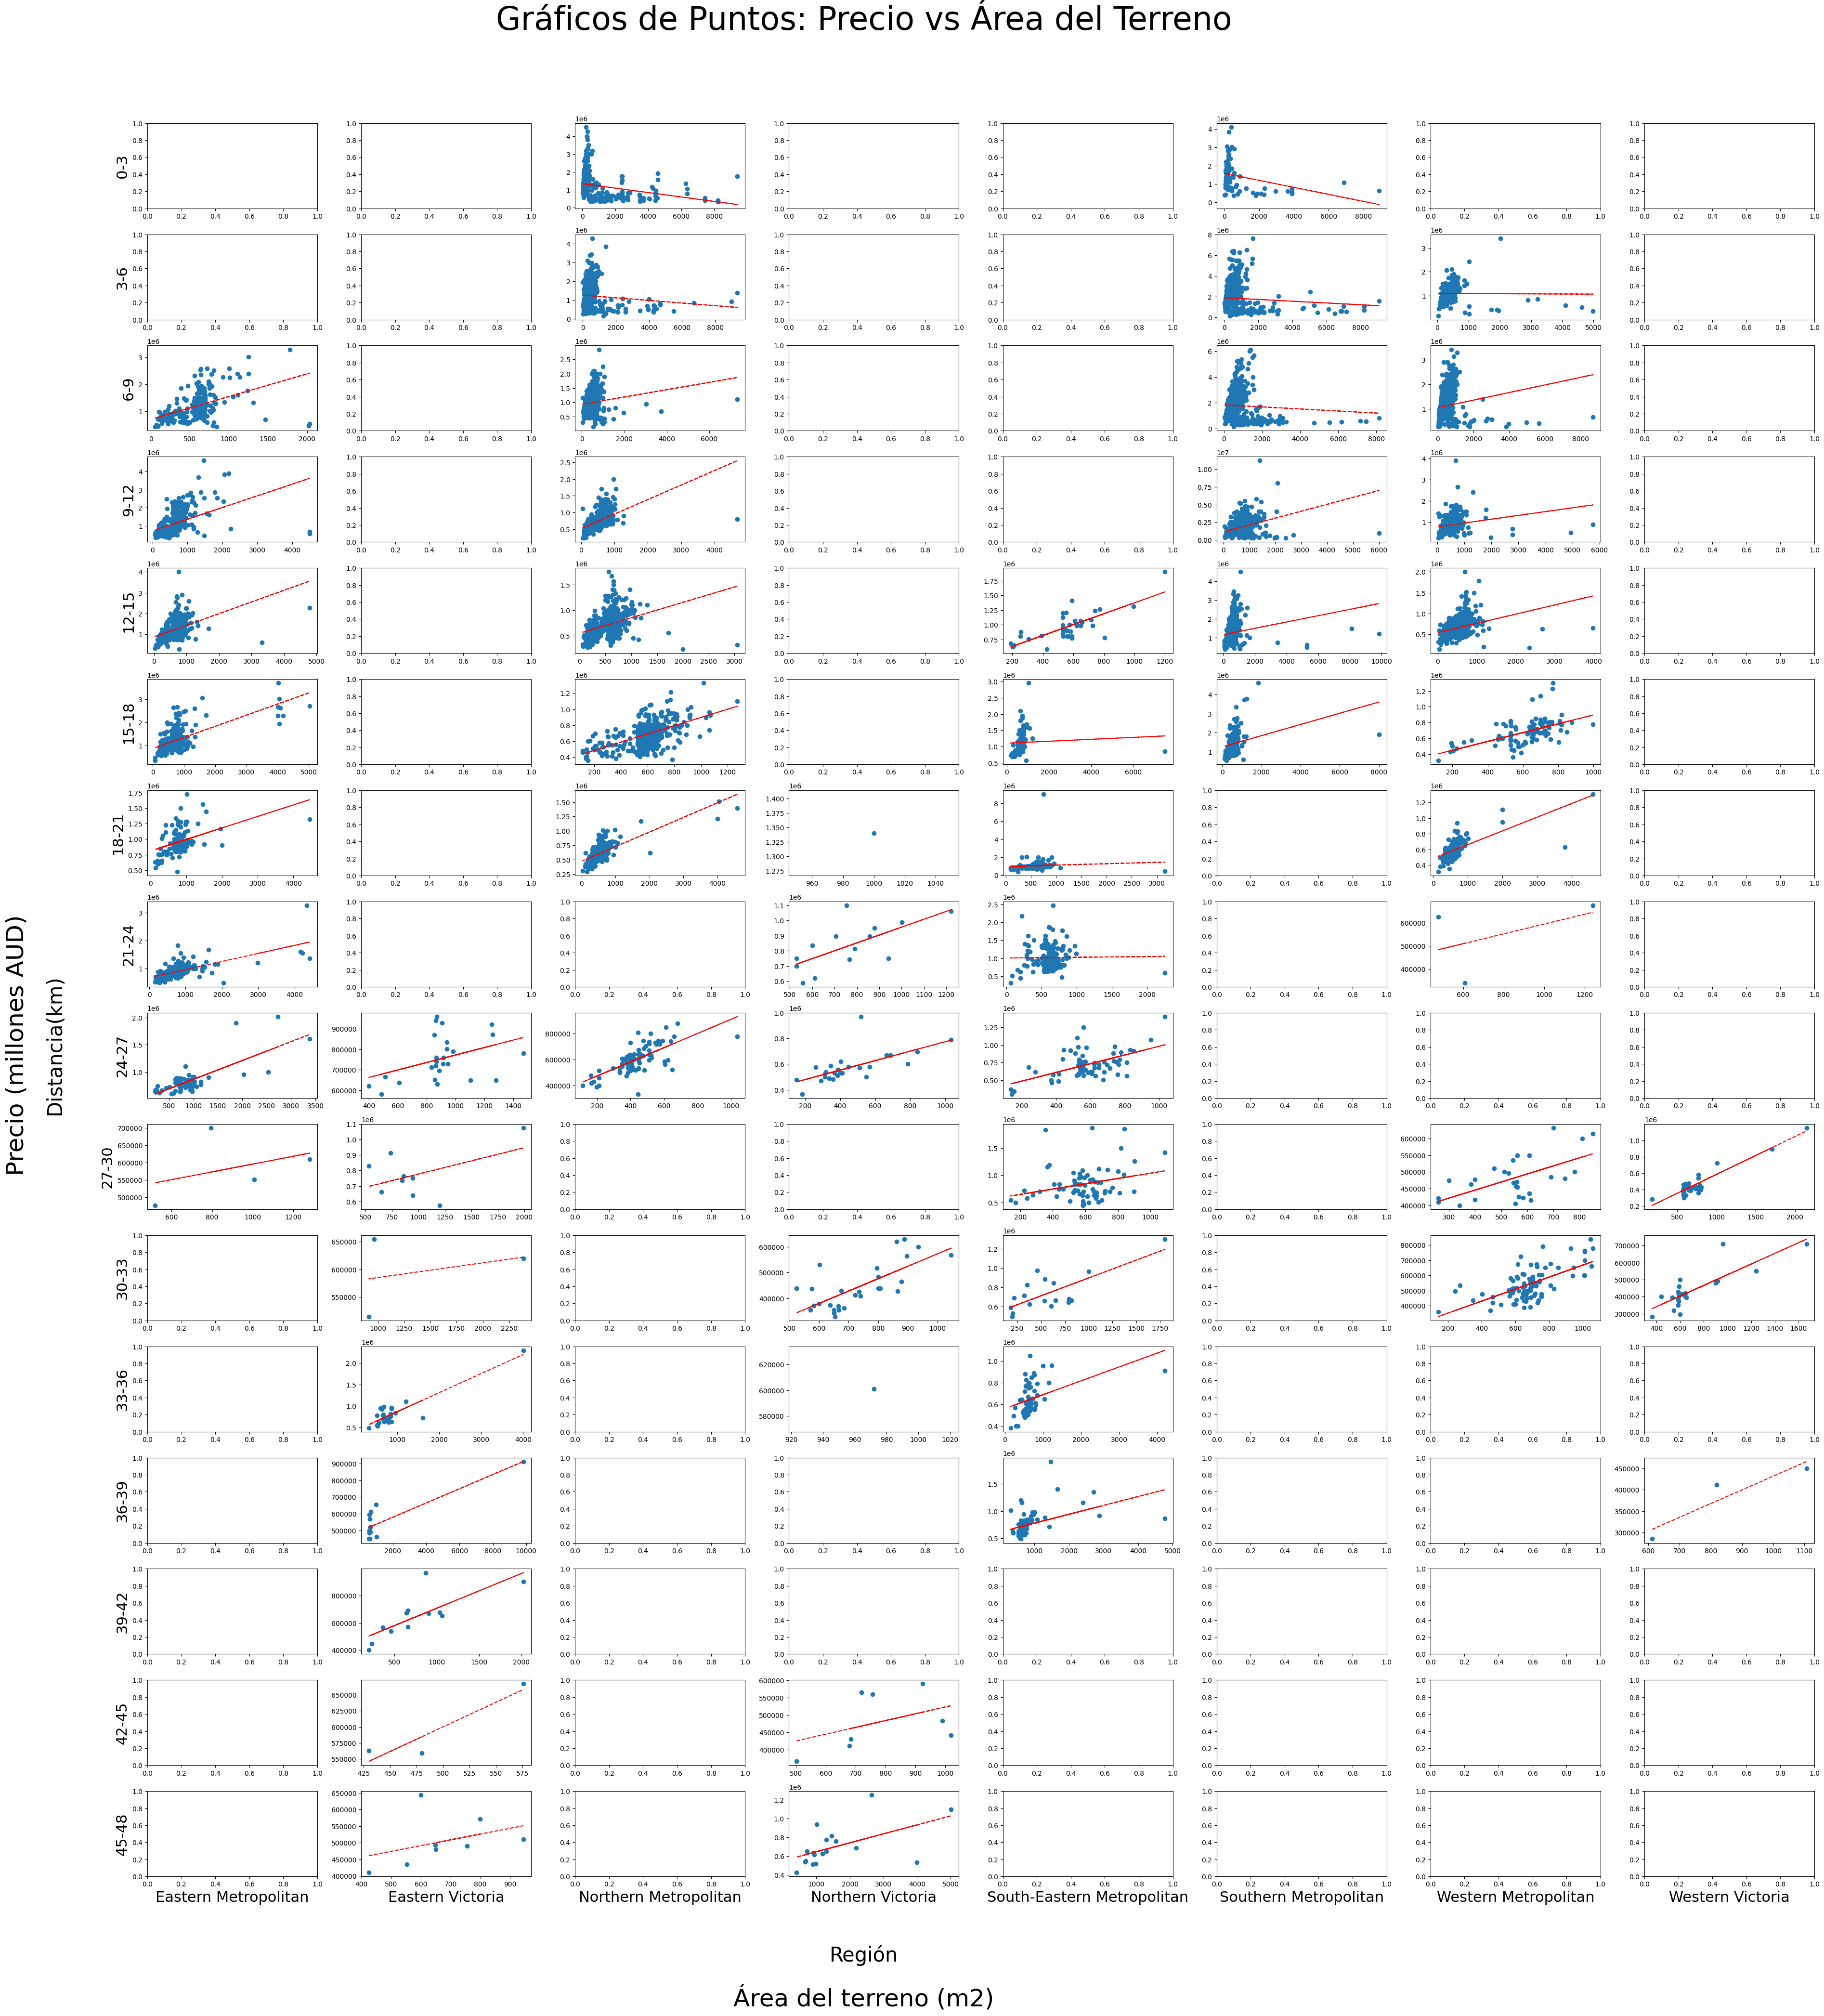

In [27]:
# Crear la figura para los subplots
fig, axes = plt.subplots(Nro_filas, Nro_columnas, figsize=(40, 45))
#Hago las condiciones para considerar todos los cuadrantes
for fila, distance in enumerate(filas):
  for columna, region in enumerate(columnas):
    #Creo un filtro del DF según la región y distancia
    filtro = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]

    #Defino las coordenadas del gráfico
    ax = axes[fila,columna]

    #Para ahorrar memoria solo graficaré solo si hay datos
    if len(filtro) > 0:
      #Identifico que graficaré en cada eje
      x = filtro['Landsize']
      y = filtro['Price']
      #Hago el gráfico de este filtro
      ax.scatter(x, y)
      # Calcular la línea de tendencia
      z = np.polyfit(x, y, 1)
      p = np.poly1d(z)

      # Dibujar la línea de tendencia
      ax.plot(x, p(x), "r--")

    #Ejes informativos
    #Condiciones: primera columna y última fila (ambos ejes); última fila (ejes x); primera columna (eje y)
    if (fila == len(filas)-1) and (columna == 0):
      ax.set_xlabel(region, fontsize=22)
      ax.set_ylabel(distance, fontsize=22)
    elif (fila == len(filas)-1):
      ax.set_xlabel(region, fontsize=22)
    elif (columna == 0):
      ax.set_ylabel(distance, fontsize=22)

#Título, nombres de eje "x" e "y" del grid
#Etiqueta común para el eje X, Y y Título
fig.text(0.5, 0.06, 'Área del terreno (m2)', ha='center', va='center', fontsize=36)
fig.text(0.5, 0.08, 'Región', ha='center', va='center', fontsize=30)
fig.text(0.06, 0.5, 'Precio (millones AUD)', ha='center', va='center', rotation='vertical', fontsize=36)
fig.text(0.08, 0.5, 'Distancia(km)', ha='center', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Gráficos de Puntos: Precio vs Área del Terreno', fontsize=48)

# Ajustar los espacios entre los subplots
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])

#plot
plt.show()

Los elementos muycercanos al centro de la ciudad no muestran mucha relación. Los demás elementos muestran mejor relación, sin embargo aún figuran outliers. <br>
Procederé a detectar los outliers matemáticamente (dentro de los grupos distancia y región), revizar que no sean data significativa y de ser el caso limpiar esta data.

### **Outliers**

#### Cálculo de Outliers

Utilizaré el método matemático para detectar los outliers:


1.   Cálculo de cuartiles
2.   Cálculo del rango intercuartílico
3.   Detección de outliers (valores menores al primer cuartil menos 1.5 veces el rango intercuartílico, y valores mayores al tercer cualtil más 1.5 veces el rango intercuartílico).

Luego calcularé que porcentaje de datos son outliers. Si no son significativos los eliminaré, y si son significativos buscaré otra alternativa. <br>

Para iniciar creare un indicador de precio/terreno y trabajar sobre ello.



In [28]:
# Definir una función para aplicar estilos condicionales a las celdas
def color_cells(val):
    """
    Esta función aplica color de fondo a las celdas basado en el valor.
    """
    if val >= 15:
        color = 'background-color: orange'
    elif val >= 8:
        color = 'background-color: yellow'
    else:
        color = 'background-color: light-gray'

    return color

In [29]:
#Creo la columna "Price-land" = Price / Landsize en nuestro DF
melb_df2_ordenado['Price-land'] = melb_df2_ordenado['Price'] / melb_df2_ordenado['Landsize']

#Creo un DF temporal con las columnas que utilizaré para optimizar
df_temp = melb_df2_ordenado[['Regionname', 'DistanceRange', 'Landsize', 'Price', 'Price-land']]

#Creo las listas para almacenar los resultados
Region_acum = []
DistanceRange_acum = []
Nro_datos_acum = []
Nro_outliers_acum = []

#Identifico las variables que usaré para dividir en grupos
DistanceRange = filas
Regionname = columnas

#Separo en grupos
for region in Regionname:
  for distance in DistanceRange:
    #Creo el DF filtro con los grupos correspodientes
    filtro  = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]
    filtro = filtro['Price-land']

    #Solo calculo si hay datos
    if len(filtro) >0:
      #Número de datos del filtro
      Nro_filtro = len(filtro)
      # Calcular los cuartiles
      Q1 = np.percentile(filtro, 25)
      Q2 = np.percentile(filtro, 50)  # También conocido como la mediana
      Q3 = np.percentile(filtro, 75)

      # Calcular el IQR
      IQR = Q3 - Q1

      # Calcular los límites para detectar outliers
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Identificar los outliers
      outliers = filtro[(filtro < lower_bound) | (filtro > upper_bound)]

      # Guardo los resultados
      Region_acum.append(region)
      DistanceRange_acum.append(distance)
      Nro_datos_acum.append(len(filtro))
      Nro_outliers_acum.append(len(outliers))

#Creo el DF con los datos
df_outliers = pd.DataFrame({
    "Region": Region_acum,
    "Distance": DistanceRange_acum,
    "Nro_datos": Nro_datos_acum,
    "Nro_outliers": Nro_outliers_acum
})

#Calculo de porcentaje
df_outliers['Porcentaje outliers'] = round(df_outliers["Nro_outliers"] / df_outliers['Nro_datos'] * 100 , 2)

#Aplico colores (con la formula definida arriba) según porcentaje
df_outliers_style = df_outliers.style.applymap(color_cells, subset=['Porcentaje outliers'])

#Muestro los resultados
df_outliers_style

In [30]:
# Calcular los outliers totales
total_row = df_outliers.select_dtypes(include='number').sum()
#Y corrijo el Porcentaje con los totales
total_row['Porcentaje outliers'] = round(total_row["Nro_outliers"] / total_row['Nro_datos'] * 100 , 2)

total_row

Nro_datos              15847.00
Nro_outliers             817.00
Porcentaje outliers        5.16
dtype: float64

Podemos ver algunas áreas con porcentaje al rededor del 10% de outliers, pero con pocos datos. Ellos se refleja en el 5.16% de outliers del total del dataset limpio. Por ello no se considera muy significativo. <br>
Por ende, los detectaremos y promediaremos. <br>
Para los resultados finales se considerará indicar el Porcentaje de outliers promediados (los datos se encuentran df_outliers).


#### Detección de Outliers

In [31]:
#Creo un DF temporal con las columnas que utilizaré para optimizar
df_temp = melb_df2_ordenado[['Regionname', 'DistanceRange', 'Price-land']]
#Tambien creo el indice como columna para identificar en el DF original
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index': 'Original_Index'}, inplace=True)

#Creo un DF vacio para ir acumulando los resultados
df_outliers = pd.DataFrame(columns=['Original_Index', 'Regionname', 'DistanceRange', 'Price-land'])

#Identifico las variables que usaré para dividir en grupos
DistanceRange = filas
Regionname = columnas

#Separo en grupos
for region in Regionname:
  for distance in DistanceRange:
    #Creo el DF filtro con los grupos correspodientes
    filtro  = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]

    #Solo calculo si hay datos
    if len(filtro) >0:
      #Número de datos del filtro
      Nro_filtro = len(filtro)
      # Calcular los cuartiles
      Q1 = np.percentile(filtro['Price-land'], 25)
      Q2 = np.percentile(filtro['Price-land'], 50)  # También conocido como la mediana
      Q3 = np.percentile(filtro['Price-land'], 75)

      # Calcular el IQR
      IQR = Q3 - Q1

      # Calcular los límites para detectar outliers
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Identificar los outliers
      outliers = filtro[(filtro['Price-land'] < lower_bound) | (filtro['Price-land'] > upper_bound)]

      # Anexo los resultados al DF outliers
      df_outliers = pd.concat([df_outliers, outliers])


#Y los muestro
df_outliers.head()

Original_Index            Regionname DistanceRange   Price-land
6               6  Eastern Metropolitan           6-9  9466.019417
17             17  Eastern Metropolitan           6-9  5441.988950
28             28  Eastern Metropolitan           6-9  5084.745763
35             35  Eastern Metropolitan           6-9  6133.333333
40             40  Eastern Metropolitan           6-9  8907.407407

In [32]:
#Compruebo que esten todos los outliers
Nro_outliers_calculado = total_row['Nro_outliers']
Nro_outliers_detectado = len(df_outliers)

#Diferencia
if Nro_outliers_calculado == Nro_outliers_detectado:
  resultado = "la candidad de outliers coincide"
else:
  resultado = "los outliers calculados y detectados no coinciden"

#Imprimo los resultados
print(f'Se calculador {Nro_outliers_calculado} outliers, y se detectarón {Nro_outliers_detectado}. \
Por tanto, {resultado}')

Se calculador 817.0 outliers, y se detectarón 817. Por tanto, la candidad de outliers coincide


Creare la columna Indice sobre el DF principal y comrpobare que los valores coincidan con df_outliers.

In [33]:
#Creacion de columna index sobre DF principal
melb_df2_ordenado = melb_df2_ordenado.reset_index()
melb_df2_ordenado.rename(columns={'index': 'Original_Index'}, inplace=True)

melb_df2_ordenado.head(2)

Original_Index   Suburb            Address  Rooms Type      Price Method  \
0               0  Ivanhoe  29 Livingstone St      4    h  1350000.0     PI   
1               1  Ivanhoe   1/12 Thoresby Gr      3    h  1300000.0     PI   

  SellerG       Date  Distance  ...  Landsize  BuildingArea  YearBuilt  \
0  Nelson  3/06/2017       7.8  ...     587.0           NaN        NaN   
1  Nelson  3/06/2017       7.8  ...     334.0         128.0     2005.0   

            CouncilArea  Lattitude  Longtitude            Regionname  \
0  Banyule City Council  -37.76737   145.03944  Eastern Metropolitan   
1  Banyule City Council  -37.76538   145.04964  Eastern Metropolitan   

  Propertycount  DistanceRange   Price-land  
0        5549.0            6-9  2299.829642  
1        5549.0            6-9  3892.215569  

[2 rows x 24 columns]

In [34]:
#Compruebo que los indices me brinden los mismos valores
# Uno melb_df2['Price-land'] al df_outliers con el indice
df_outliers = df_outliers.merge(melb_df2_ordenado[['Original_Index', 'Price-land']], on='Original_Index', how='left', suffixes=('', '-data'))

#Creo una columna de verificación
df_outliers['verificacion'] = df_outliers['Price-land'] == df_outliers['Price-land-data']

#Verifico que los datos sean correctos (con el indicador Price-land)
Coincide = df_outliers.loc[df_outliers['verificacion'] == True]
No_coincide = df_outliers.loc[df_outliers['verificacion']==False]

# Verifico la cantidad de datos
Nro_datos = len(Coincide) + len(No_coincide)

#Imprimo los resultados
print(f'{len(Coincide)} datos coinciden y {len(No_coincide)} datos no coinciden \
\n dando {Nro_datos} de {Nro_outliers_calculado} calculados')

df_outliers.head(2)

817 datos coinciden y 0 datos no coinciden 
 dando 817 de 817.0 calculados


Original_Index            Regionname DistanceRange   Price-land  \
0              6  Eastern Metropolitan           6-9  9466.019417   
1             17  Eastern Metropolitan           6-9  5441.988950   

   Price-land-data  verificacion  
0      9466.019417          True  
1      5441.988950          True

Al coincidir los valores, procedo a eliminarlos outliers de melb_df2_ordenados

In [35]:
# Compruebo la cantidad inicial de datos
Nro_datos_inicial = len(melb_df2_ordenado)

#Eliminos las columnas que posean el mismo Original_index de df_outliers
melb_df2_ordenado = melb_df2_ordenado.loc[~melb_df2_ordenado['Original_Index'].isin(df_outliers['Original_Index'])]

#Compruebo la cantidad final de datos
Nro_datos_final = len(melb_df2_ordenado)

#Verifico que se hayan eliminado solo los 817 datos
Datos_eliminados = Nro_datos_inicial - Nro_datos_final
print(f'Se eliminaron {Datos_eliminados} datos')

#Imprimo una muestra y verifico que Original_index = 6 (Outlier) se elimino correctamente
melb_df2_ordenado[5:7]

Se eliminaron 817 datos


Original_Index   Suburb       Address  Rooms Type      Price Method  \
5               5  Ivanhoe   83 Oriel Rd      3    h  1035000.0      S   
7               7  Ivanhoe  128 Green St      3    h  1475000.0      S   

  SellerG        Date  Distance  ...  Landsize  BuildingArea  YearBuilt  \
5   Miles  24/06/2017       7.8  ...     585.0           NaN        NaN   
7  Nelson  27/05/2017       7.8  ...     424.0         114.0     1950.0   

            CouncilArea  Lattitude  Longtitude            Regionname  \
5  Banyule City Council  -37.75725   145.03744  Eastern Metropolitan   
7  Banyule City Council  -37.76353   145.02941  Eastern Metropolitan   

  Propertycount  DistanceRange   Price-land  
5        5549.0            6-9  1769.230769  
7        5549.0            6-9  3478.773585  

[2 rows x 24 columns]

Viendo que el método funciona lo repito hasta quedar sin outliers.

In [36]:
#Almaceno de manera informatica la cantidad de outliers eliminados
eliminacion_total_ouliers = Datos_eliminados

while Datos_eliminados > 0:
  #Creo un DF temporal con las columnas que utilizaré para optimizar
  df_temp = melb_df2_ordenado[['Original_Index', 'Regionname', 'DistanceRange', 'Price-land']]

  #Creo un DF vacio para ir acumulando los resultados
  df_outliers = pd.DataFrame(columns=['Original_Index', 'Regionname', 'DistanceRange', 'Price-land'])

  #Identifico las variables que usaré para dividir en grupos
  DistanceRange = filas
  Regionname = columnas

  #Separo en grupos
  for region in Regionname:
    for distance in DistanceRange:
      #Creo el DF filtro con los grupos correspodientes
      filtro  = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]

      #Solo calculo si hay datos
      if len(filtro) >0:
        #Número de datos del filtro
        Nro_filtro = len(filtro)
        # Calcular los cuartiles
        Q1 = np.percentile(filtro['Price-land'], 25)
        Q2 = np.percentile(filtro['Price-land'], 50)  # También conocido como la mediana
        Q3 = np.percentile(filtro['Price-land'], 75)

        # Calcular el IQR
        IQR = Q3 - Q1

        # Calcular los límites para detectar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar los outliers
        outliers = filtro[(filtro['Price-land'] < lower_bound) | (filtro['Price-land'] > upper_bound)]

        # Anexo los resultados al DF outliers
        df_outliers = pd.concat([df_outliers, outliers])

  # Compruebo la cantidad inicial de datos
  Nro_datos_inicial = len(melb_df2_ordenado)

  #Eliminos las columnas que posean el mismo Original_index de df_outliers
  melb_df2_ordenado = melb_df2_ordenado.loc[~melb_df2_ordenado['Original_Index'].isin(df_outliers['Original_Index'])]

  #Compruebo la cantidad final de datos
  Nro_datos_final = len(melb_df2_ordenado)

  #Verifico que se hayan eliminado solo los 817 datos
  Datos_eliminados = Nro_datos_inicial - Nro_datos_final
  print(f'Se eliminaron {Datos_eliminados} datos')

  #Suma la cantidad total
  eliminacion_total_ouliers += Datos_eliminados

#Indico cuanto elimine en total
print(f'En total, se eliminaron {eliminacion_total_ouliers} outliers')

Se eliminaron 285 datos
Se eliminaron 113 datos
Se eliminaron 47 datos
Se eliminaron 26 datos
Se eliminaron 24 datos
Se eliminaron 19 datos
Se eliminaron 36 datos
Se eliminaron 31 datos
Se eliminaron 17 datos
Se eliminaron 8 datos
Se eliminaron 2 datos
Se eliminaron 3 datos
Se eliminaron 1 datos
Se eliminaron 1 datos
Se eliminaron 0 datos
En total, se eliminaron 1430 outliers


In [37]:
#Verifico que la cantidad de datos que me quedan sean significativas:
Nro_datos_actual = len(melb_df2_ordenado)

#Calculo el porcentaje de datos a trabajar (respecto al Dataset original)
Porc_datos = Nro_datos_actual / Nro_datos_limpieza *100
Porc_datos = round(Porc_datos, 2)

#E imprimo los resultados
print(f'Quedan {Nro_datos_actual} datos, lo que corresponde al {Porc_datos}% del Dataset limpio')

Quedan 14418 datos, lo que corresponde al 90.75% del Dataset limpio


Ya no se tienen outliers, por lo que se volverá a gráficar.

### **3er Análisis precio vs terreno respecto a la región y distancia CBD (Km) - sin outliers**

In [38]:
#Ordeno y separo las filas y columnas necesarias:
melb_temp = melb_df2_ordenado.sort_values(by='Distance')
filas = melb_temp['DistanceRange'].unique()
columnas = melb_df2_ordenado['Regionname'].unique()

#Convierto las filas y columnas a listas
filas = filas.tolist()
columnas = columnas.tolist()

#Elimino los valores nulos
filas = [i for i in filas if not (isinstance(i, float) and math.isnan(i))]
columnas = [i for i in columnas if not (isinstance(i, float) and math.isnan(i))]

#Calculo la cantidad de filas y columnas para hacer los subgraficos:
Nro_filas = len(filas)
Nro_columnas = len(columnas)

#Creo un DF temporal con las columnas que utilizaré para optimizar
df_temp = melb_df2_ordenado[['Regionname', 'DistanceRange', 'Landsize', 'Price']]

<ipython-input-39-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned

<ipython-input-39-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned



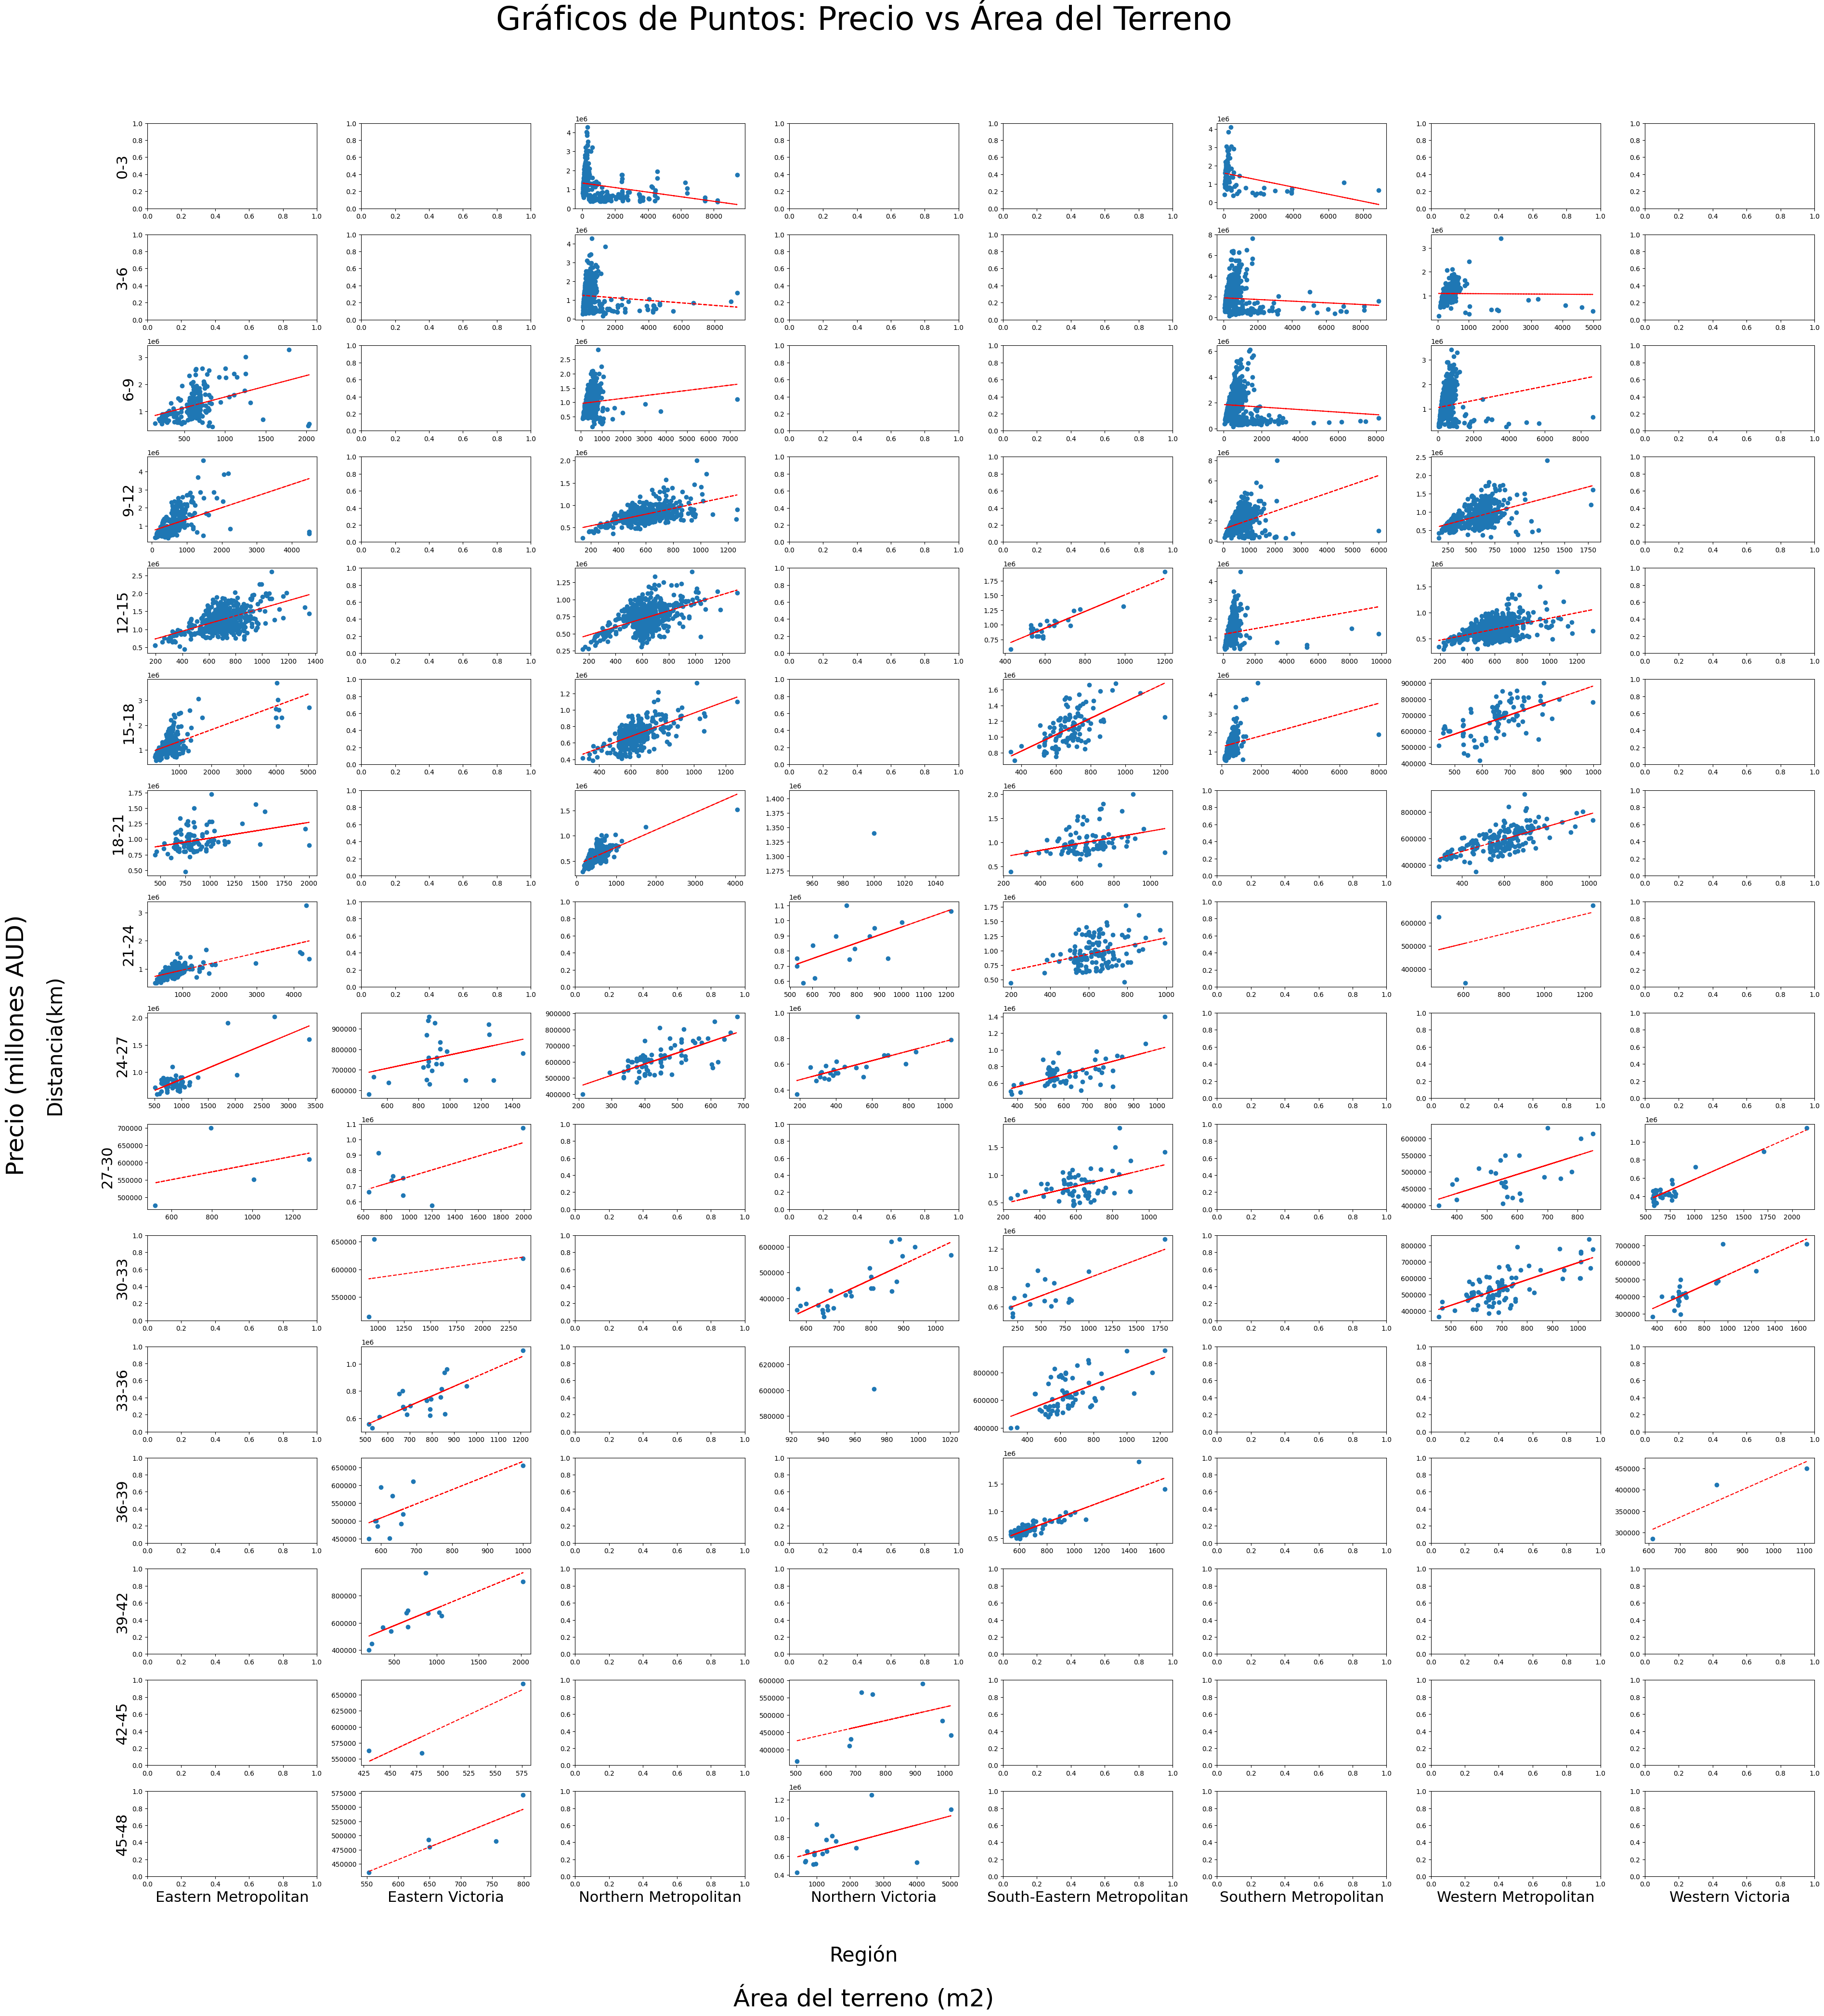

In [39]:
# Crear la figura para los subplots
fig, axes = plt.subplots(Nro_filas, Nro_columnas, figsize=(40, 45))
#Hago las condiciones para considerar todos los cuadrantes
for fila, distance in enumerate(filas):
  for columna, region in enumerate(columnas):
    #Creo un filtro del DF según la región y distancia
    filtro = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]

    #Defino las coordenadas del gráfico
    ax = axes[fila,columna]

    #Para ahorrar memoria solo graficaré solo si hay datos
    if len(filtro) > 0:
      #Identifico que graficaré en cada eje
      x = filtro['Landsize']
      y = filtro['Price']
      #Hago el gráfico de este filtro
      ax.scatter(x, y)
      # Calcular la línea de tendencia
      z = np.polyfit(x, y, 1)
      p = np.poly1d(z)

      # Dibujar la línea de tendencia
      ax.plot(x, p(x), "r--")

    #Ejes informativos
    #Condiciones: primera columna y última fila (ambos ejes); última fila (ejes x); primera columna (eje y)
    if (fila == len(filas)-1) and (columna == 0):
      ax.set_xlabel(region, fontsize=22)
      ax.set_ylabel(distance, fontsize=22)
    elif (fila == len(filas)-1):
      ax.set_xlabel(region, fontsize=22)
    elif (columna == 0):
      ax.set_ylabel(distance, fontsize=22)

#Título, nombres de eje "x" e "y" del grid
#Etiqueta común para el eje X, Y y Título
fig.text(0.5, 0.06, 'Área del terreno (m2)', ha='center', va='center', fontsize=36)
fig.text(0.5, 0.08, 'Región', ha='center', va='center', fontsize=30)
fig.text(0.06, 0.5, 'Precio (millones AUD)', ha='center', va='center', rotation='vertical', fontsize=36)
fig.text(0.08, 0.5, 'Distancia(km)', ha='center', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Gráficos de Puntos: Precio vs Área del Terreno', fontsize=48)

# Ajustar los espacios entre los subplots
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])

#plot
plt.show()


El análisis se hace por región. <br>
En los rangos de 0 a 9km desde el centro de ciudad (CBD), no se encuentra relación directa. Se debe revisar si influye la cantidad de habitaciones, cocheras u otros factores. <br>
Desde 9 a 48 km del CBD se ve una mejor relacion (dividiendo la distancia en rangos de 3km). <br>
Verificaré correlación para corroborar esta hipótesis.

In [40]:
# Listas para almacenar los resultados
Distancerange = []
Regionname = []
Nro_datos = []
correl_price_landsize = []

# Dividir en distancias
for distancias in filas:
    filtro_distance = melb_df2_ordenado[melb_df2_ordenado['DistanceRange'] == distancias]
    if len(filtro_distance) > 0:
        # Dividir por regiones
        for region in columnas:
            #Suprimo los warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", UserWarning)
                #Filtro la region
                filtro = filtro_distance[filtro_distance['Regionname'] == region]
                # Si hay datos
                if len(filtro) > 0:
                    # Calculo la matriz de correlación
                    correlation_matrix = filtro[['Price', 'Landsize']].corr()
                    # Extraer el valor de la correlación entre Price y Landsize
                    correlation_price_landsize = correlation_matrix.loc['Price', 'Landsize']
                    # Acumulo los resultados
                    Distancerange.append(distancias)
                    Regionname.append(region)
                    Nro_datos.append(len(filtro))
                    correl_price_landsize.append(correlation_price_landsize)

                else:
                    correlation_price_landsize = np.nan
                    # Acumulo los resultados
                    Distancerange.append(distancias)
                    Regionname.append(region)
                    Nro_datos.append(math.nan)
                    correl_price_landsize.append(correlation_price_landsize)

#Creo la lista para % de datos (del DF principal)
porc_datos = []
for i in Nro_datos:
  if i > 0:
    porc = round(i/len(melb_df2_ordenado)*100, 2)
    porc_datos.append(porc)
  else:
    porc_datos.append(math.nan)

# Creo el DataFrame de correlación
correl_price_landsize_df = pd.DataFrame({
    'Distancerange': Distancerange,
    'Regionname': Regionname,
    'Nro_datos': Nro_datos,
    'Porc_datos (%)': porc_datos,
    'correl_price_landsize': correl_price_landsize
})

#Muestro el DF
correl_price_landsize_df.head()

Distancerange                  Regionname  Nro_datos  Porc_datos (%)  \
0           0-3        Eastern Metropolitan        NaN             NaN   
1           0-3            Eastern Victoria        NaN             NaN   
2           0-3       Northern Metropolitan      490.0             3.4   
3           0-3           Northern Victoria        NaN             NaN   
4           0-3  South-Eastern Metropolitan        NaN             NaN   

   correl_price_landsize  
0                    NaN  
1                    NaN  
2              -0.272554  
3                    NaN  
4                    NaN

In [41]:
## Pivot table para visualizar mejor
# Crear la tabla dinámica (distancias vs region)
pivot_table = pd.pivot_table(correl_price_landsize_df, values='correl_price_landsize', index='Distancerange', columns='Regionname')
# Reindexar la tabla dinámica para asegurarse de que las filas estén en el orden deseado
pivot_table = pivot_table.reindex(filas)
# Reemplazar NaN con 0 o cualquier otro valor, por ejemplo, '-'
pivot_table = pivot_table.fillna('')

# Función para aplicar el estilo
def highlight_values(val):
    color = ''
    if isinstance(val, (int, float)):  # Check if val is a number
        if val < 0.5:
            color = 'red'
        elif 0.5 <= val < 0.7:
            color = 'yellow'
    return f'background-color: {color}'

# Aplicar el estilo
pivot_table = pivot_table.style.applymap(highlight_values)

# Mostrar el DataFrame resultante
pivot_table

Cuanto más se aleja del centro, más se correlacionan. Para el rango de los 9 primeros kilometros del CBD, no hay relación. Por lo que eliminaré este rango y añadiré la clausula de no contemplarlo en los límites del presente trabajo.

### **Limpieza datos - 0 a 9km del CBD**

#### **Limpieza**

In [42]:
melb_df3 = melb_df2_ordenado[(melb_df2_ordenado['DistanceRange'] != '0-3') & (melb_df2_ordenado['DistanceRange'] != '3-6') & (melb_df2_ordenado['DistanceRange'] != '6-9')]
melb_df3['DistanceRange'].unique()

['9-12', '12-15', '15-18', '18-21', '21-24', ..., '36-39', '39-42', '42-45', '45-48', NaN]
Length: 14
Categories (16, object): ['0-3' < '3-6' < '6-9' < '9-12' ... '36-39' < '39-42' < '42-45' < '45-48']

#### **Terreno vs Precio por distancia y Región**

Realizo el gráfico de Terreno vs precio con los datos restantes.

In [43]:
#Ordeno y separo las filas y columnas necesarias:
melb_temp = melb_df3.sort_values(by='Distance')
filas = melb_temp['DistanceRange'].unique()
columnas = melb_df3['Regionname'].unique()

#Convierto las filas y columnas a listas
filas = filas.tolist()
columnas = columnas.tolist()

#Elimino los valores nulos
filas = [i for i in filas if not (isinstance(i, float) and math.isnan(i))]
columnas = [i for i in columnas if not (isinstance(i, float) and math.isnan(i))]

#Calculo la cantidad de filas y columnas para hacer los subgraficos:
Nro_filas = len(filas)
Nro_columnas = len(columnas)

#Creo un DF temporal con las columnas que utilizaré para optimizar
df_temp = melb_df3[['Regionname', 'DistanceRange', 'Landsize', 'Price']]

<ipython-input-44-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned

<ipython-input-44-087a8c09a762>:20: RankWarning:

Polyfit may be poorly conditioned



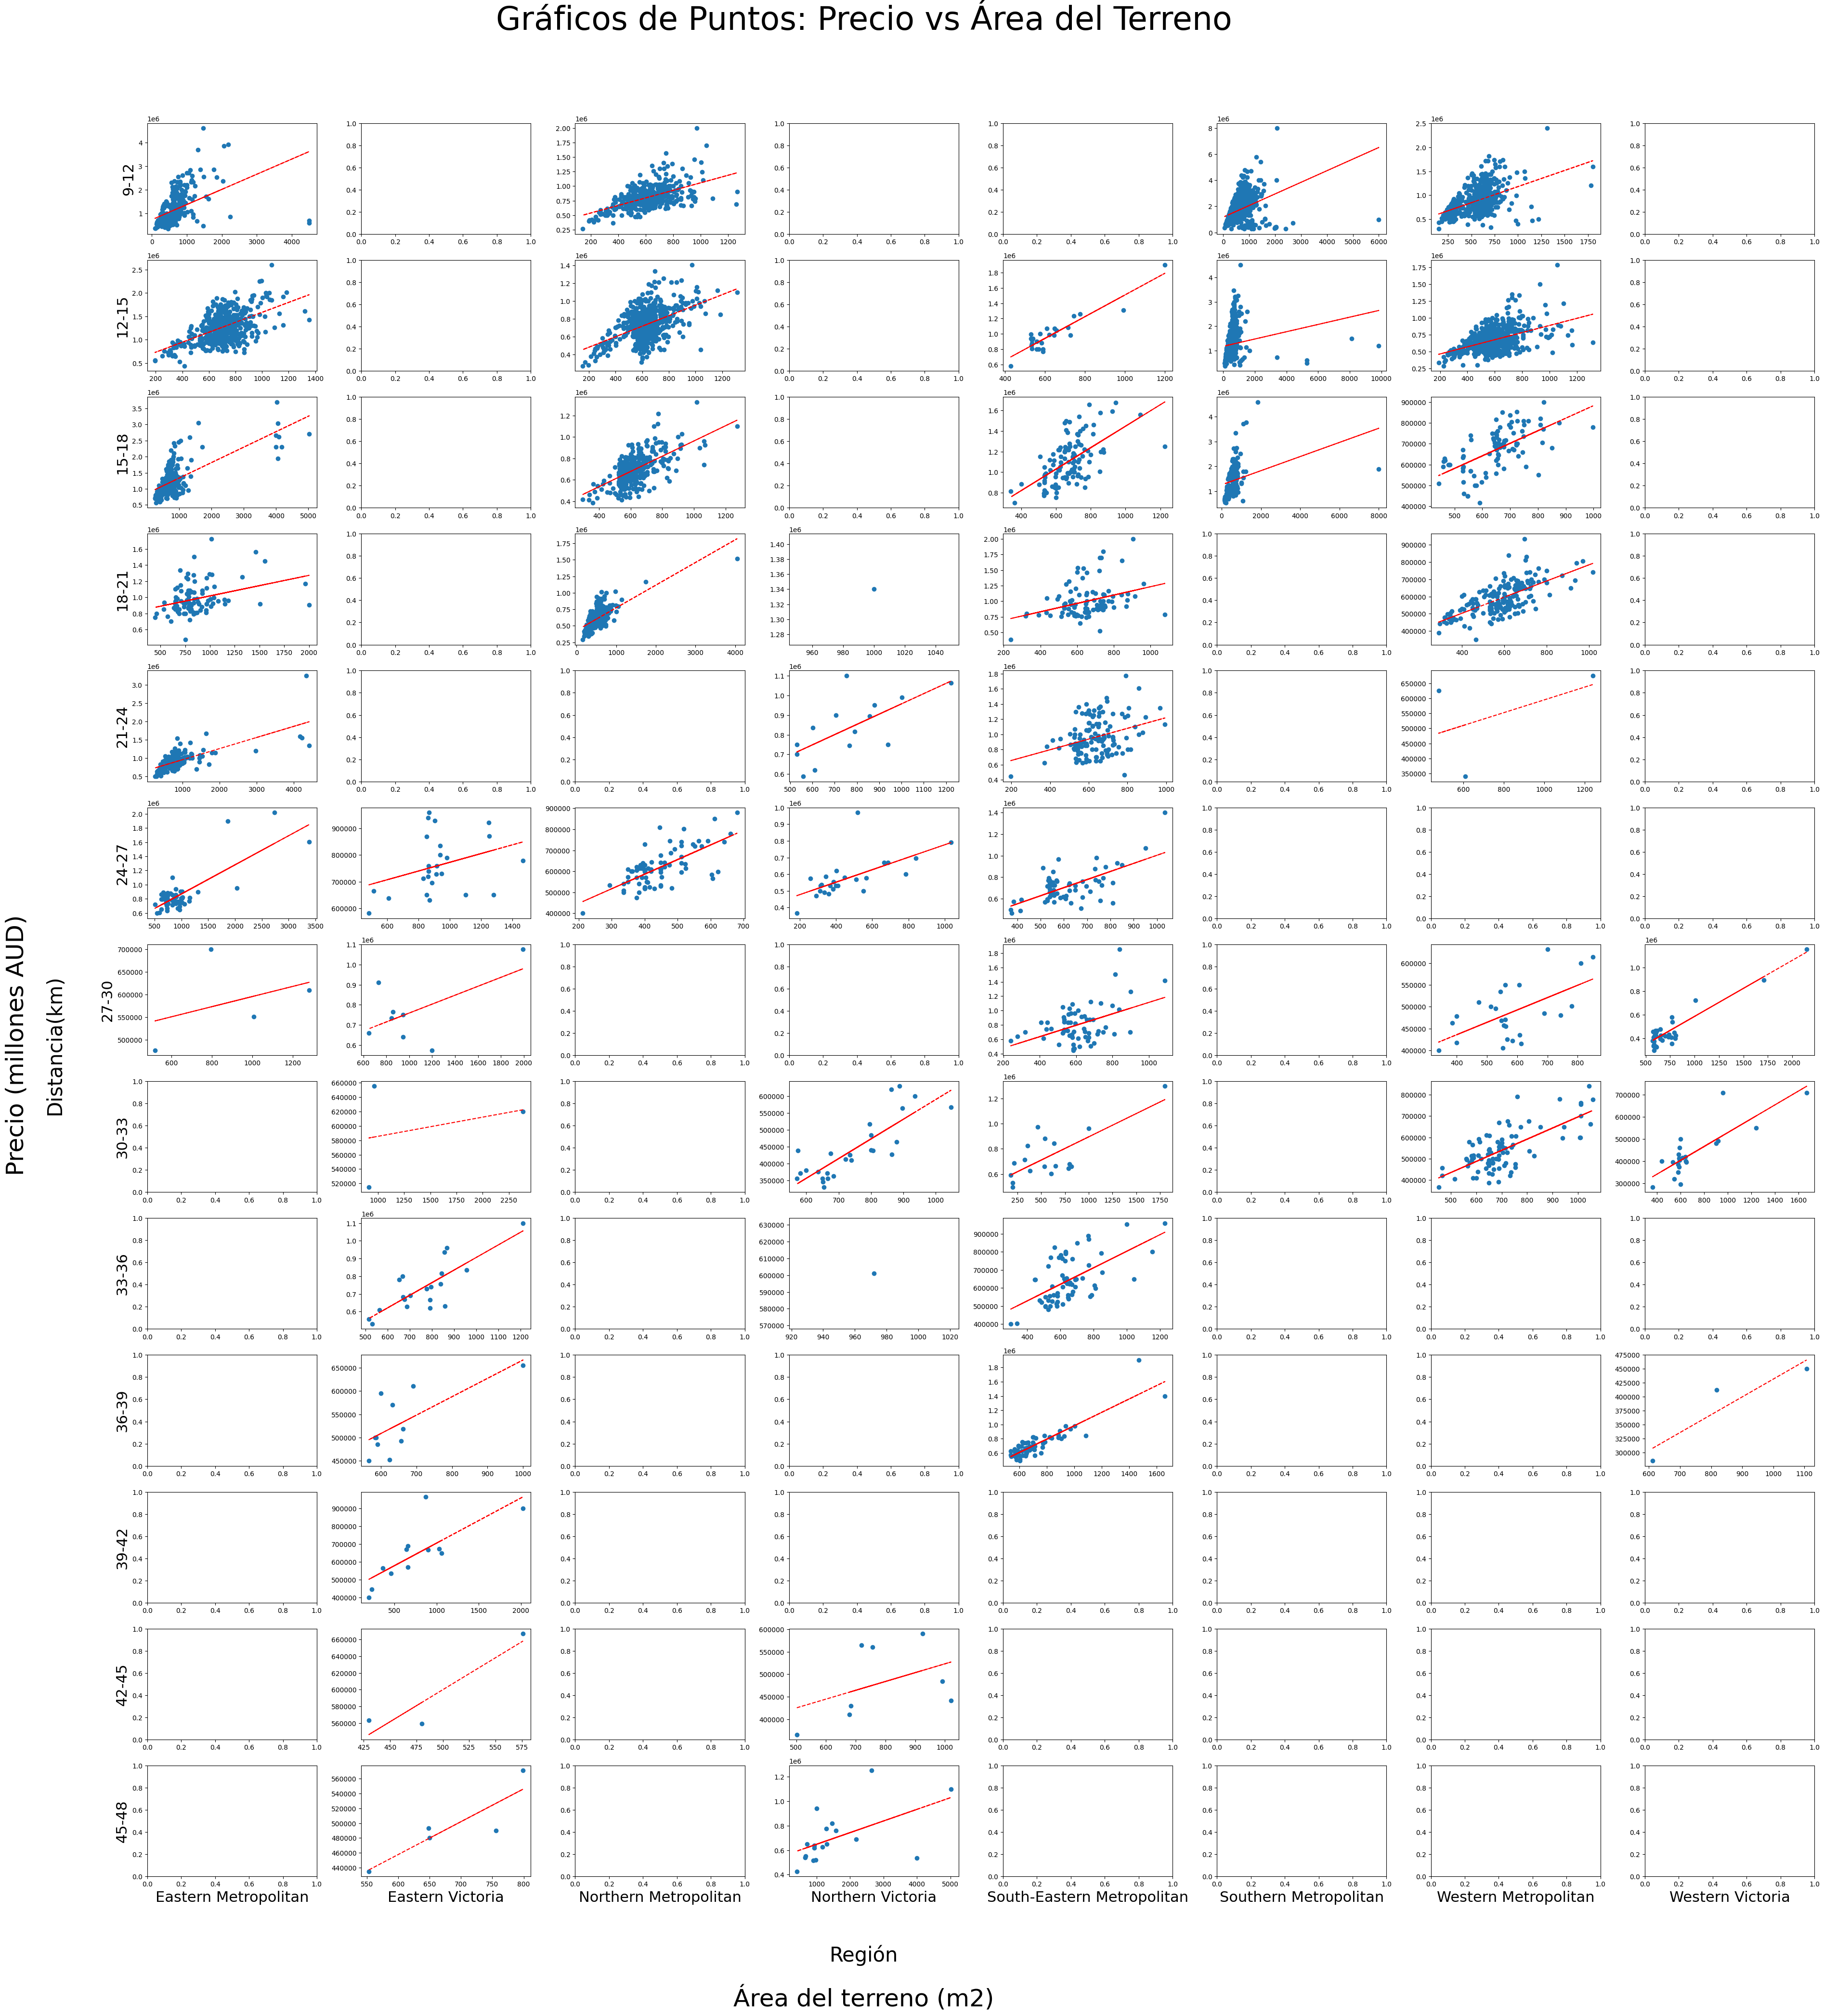

In [44]:
# Crear la figura para los subplots
fig, axes = plt.subplots(Nro_filas, Nro_columnas, figsize=(40, 45))
#Hago las condiciones para considerar todos los cuadrantes
for fila, distance in enumerate(filas):
  for columna, region in enumerate(columnas):
    #Creo un filtro del DF según la región y distancia
    filtro = df_temp.loc[(df_temp['Regionname']==region) & (df_temp['DistanceRange']==distance)]

    #Defino las coordenadas del gráfico
    ax = axes[fila,columna]

    #Para ahorrar memoria solo graficaré solo si hay datos
    if len(filtro) > 0:
      #Identifico que graficaré en cada eje
      x = filtro['Landsize']
      y = filtro['Price']
      #Hago el gráfico de este filtro
      ax.scatter(x, y)
      # Calcular la línea de tendencia
      z = np.polyfit(x, y, 1)
      p = np.poly1d(z)

      # Dibujar la línea de tendencia
      ax.plot(x, p(x), "r--")

    #Ejes informativos
    #Condiciones: primera columna y última fila (ambos ejes); última fila (ejes x); primera columna (eje y)
    if (fila == len(filas)-1) and (columna == 0):
      ax.set_xlabel(region, fontsize=22)
      ax.set_ylabel(distance, fontsize=22)
    elif (fila == len(filas)-1):
      ax.set_xlabel(region, fontsize=22)
    elif (columna == 0):
      ax.set_ylabel(distance, fontsize=22)

#Título, nombres de eje "x" e "y" del grid
#Etiqueta común para el eje X, Y y Título
fig.text(0.5, 0.06, 'Área del terreno (m2)', ha='center', va='center', fontsize=36)
fig.text(0.5, 0.08, 'Región', ha='center', va='center', fontsize=30)
fig.text(0.06, 0.5, 'Precio (millones AUD)', ha='center', va='center', rotation='vertical', fontsize=36)
fig.text(0.08, 0.5, 'Distancia(km)', ha='center', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Gráficos de Puntos: Precio vs Área del Terreno', fontsize=48)

# Ajustar los espacios entre los subplots
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])

#plot
plt.show()

#### **Gráfico sin desagrupar distancias**

Se visualiza una buena relación, aseguraré si la distancia ahora afecta.

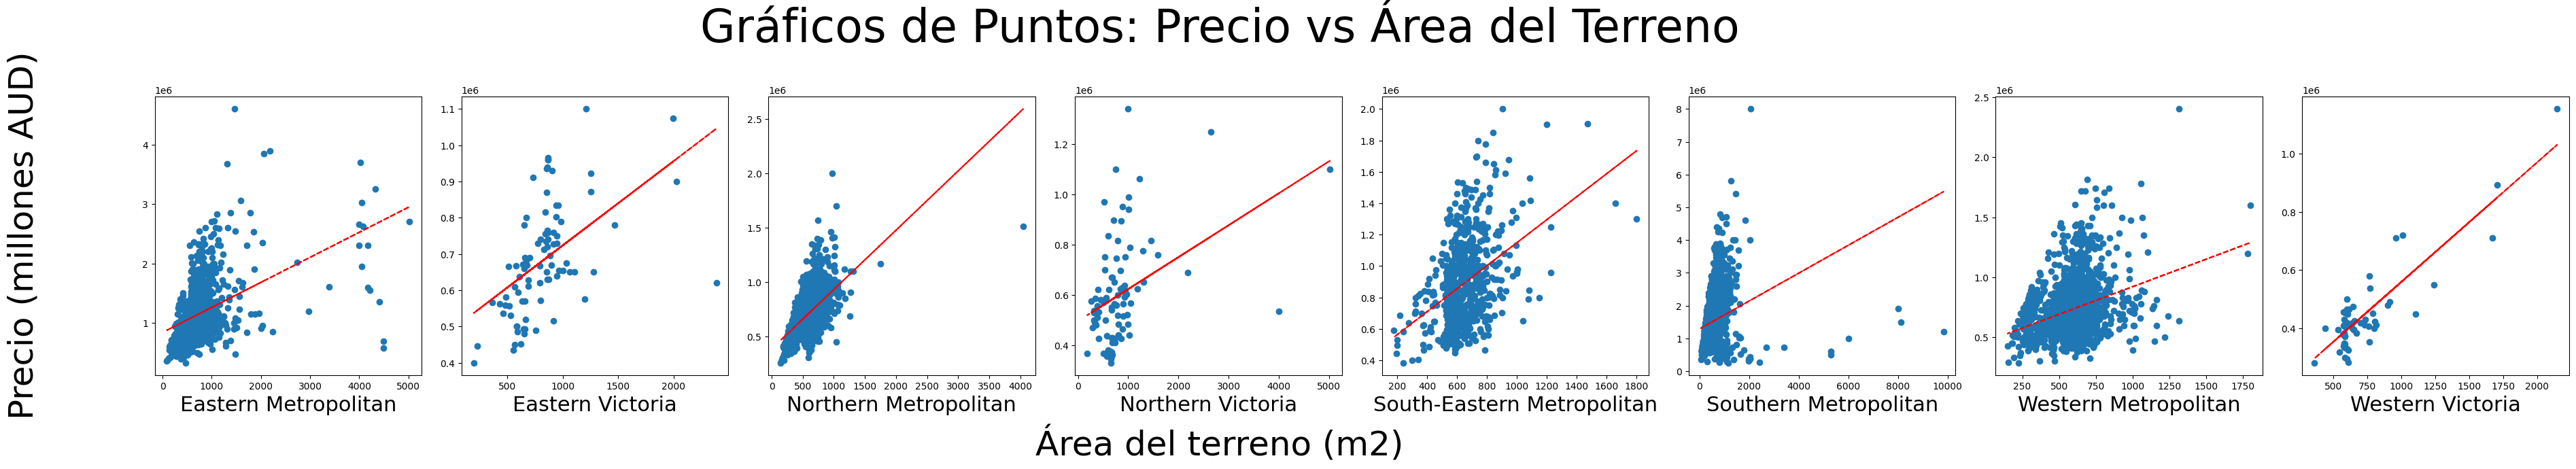

In [45]:
# Crear la figura para los subplots
fig, axes = plt.subplots(1, Nro_columnas, figsize=(40, 7))
#Hago las condiciones para considerar todos los cuadrantes
for columna, region in enumerate(columnas):
  #Creo un filtro del DF según la región y distancia
  filtro = df_temp.loc[(df_temp['Regionname']==region)]

  #Defino las coordenadas del gráfico
  ax = axes[columna]

  #Para ahorrar memoria solo graficaré solo si hay datos
  if len(filtro) > 0:
    #Identifico que graficaré en cada eje
    x = filtro['Landsize']
    y = filtro['Price']
    #Hago el gráfico de este filtro
    ax.scatter(x, y)
    # Calcular la línea de tendencia
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    # Dibujar la línea de tendencia
    ax.plot(x, p(x), "r--")

  #Ejes informativos
  ax.set_xlabel(region, fontsize=22)

#Título, nombres de eje "x" e "y" del grid
#Etiqueta común para el eje X, Y y Título
fig.text(0.5, 0.06, 'Área del terreno (m2)', ha='center', va='center', fontsize=36)
fig.text(0.06, 0.5, 'Precio (millones AUD)', ha='center', va='center', rotation='vertical', fontsize=36)
fig.suptitle('Gráficos de Puntos: Precio vs Área del Terreno', fontsize=48)

# Ajustar los espacios entre los subplots
plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])

#plot
plt.show()

#### **Gráfico sin desagrupar regiones**

Ha excepción de Southern Metropoitan, se visualiza una buena relación, aseguraré si la región ahora afecta.

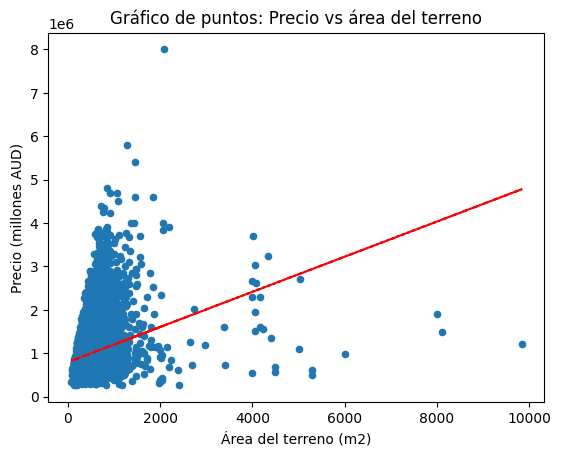

In [46]:
#Gráfico de puntos
melb_df3.plot.scatter(x='Landsize', y='Price')

#Etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

# Calcular la línea de tendencia
x = melb_df3['Landsize']
y = melb_df3['Price']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Dibujar la línea de tendencia
plt.plot(x, p(x), "r--")

# Mostrar el gráfico con la línea de tendencia
plt.show()

Revisaré Southern Metropolitan aparte y luego las demás regiones en un solo gráfico para ver la relación.

##### Southern Metropolitan

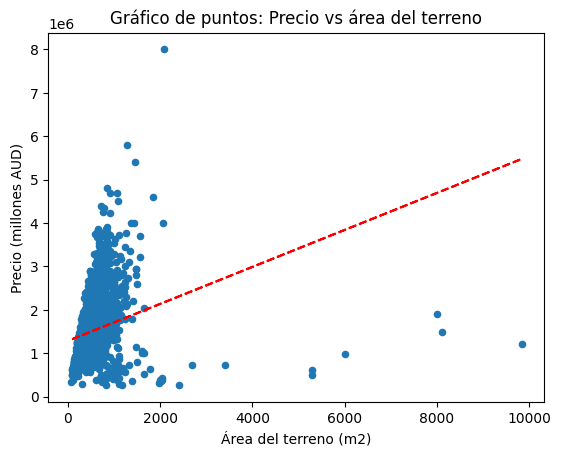

In [47]:
#Creo el filtro
melb_df3_1 = melb_df3.loc[melb_df3['Regionname'] == 'Southern Metropolitan']

#Gráfico de puntos
melb_df3_1.plot.scatter(x='Landsize', y='Price')

#Etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

# Calcular la línea de tendencia
x = melb_df3_1['Landsize']
y = melb_df3_1['Price']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Dibujar la línea de tendencia
plt.plot(x, p(x), "r--")

# Mostrar el gráfico con la línea de tendencia
plt.show()

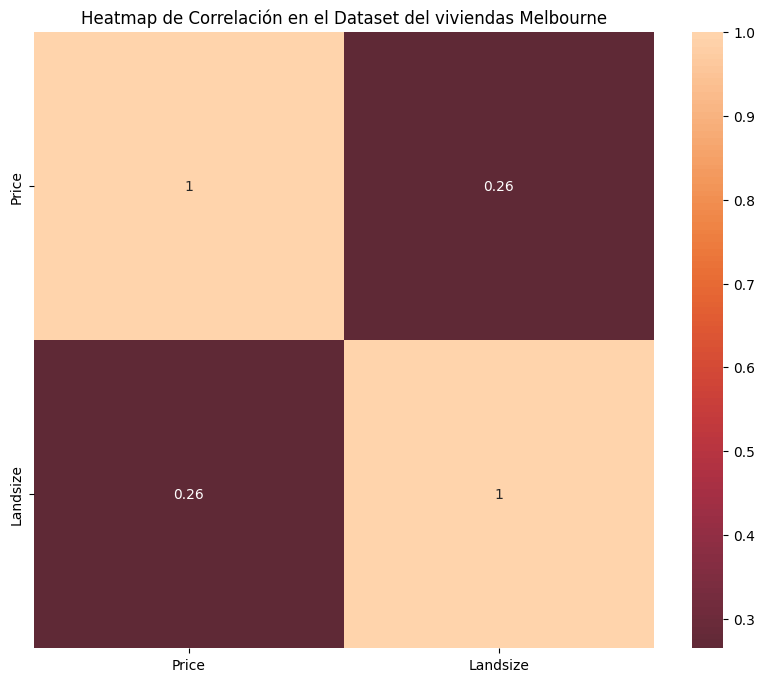

In [48]:
# Heatmap de correlación

#Creo la matriz de correlación con las variables deseadas
corrmat = melb_df3_1[['Price','Landsize']].corr()

#Y creo ek Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Establecer el título del gráfico
plt.title("Heatmap de Correlación en el Dataset del viviendas Melbourne")

# Mostrar el gráfico
plt.show()

Se visualiza una relación mala.

##### Otras regiones

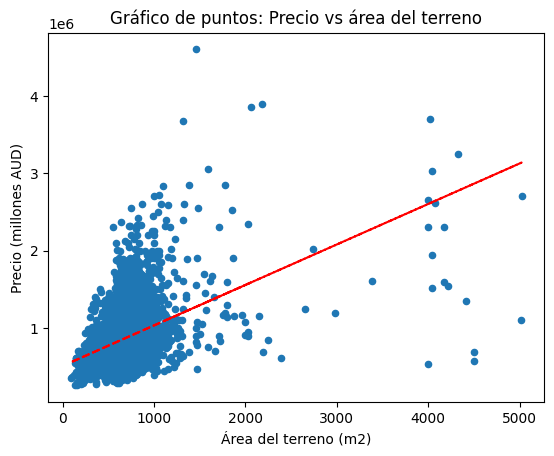

In [49]:
#Creo el filtro
melb_df3_2 = melb_df3.loc[melb_df3['Regionname'] != 'Southern Metropolitan']

#Gráfico de puntos
melb_df3_2.plot.scatter(x='Landsize', y='Price')

#Etiquetas
plt.xlabel('Área del terreno (m2)')
plt.ylabel('Precio (millones AUD)')
plt.title("Gráfico de puntos: Precio vs área del terreno")

# Calcular la línea de tendencia
x = melb_df3_2['Landsize']
y = melb_df3_2['Price']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Dibujar la línea de tendencia
plt.plot(x, p(x), "r--")

# Mostrar el gráfico con la línea de tendencia
plt.show()

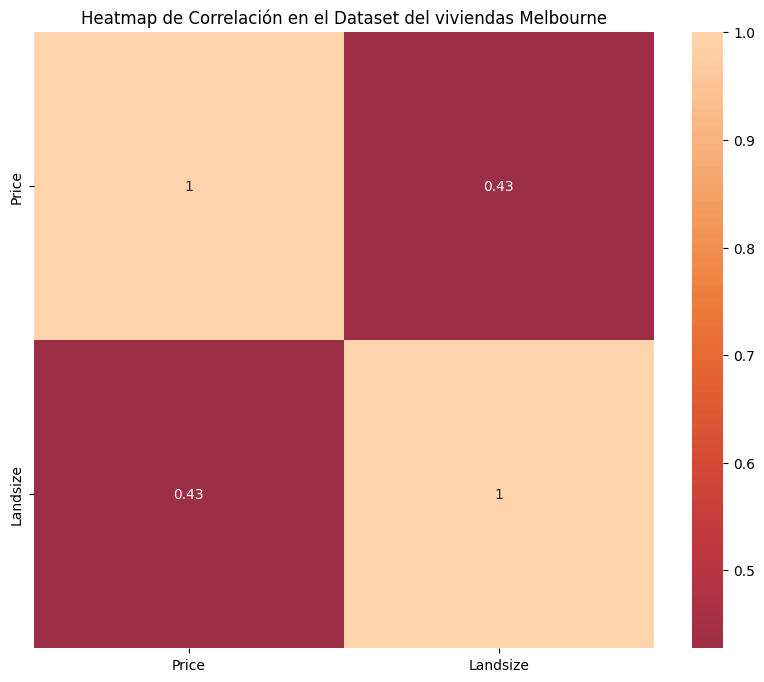

In [50]:
# Heatmap de correlación

#Creo la matriz de correlación con las variables deseadas
corrmat = melb_df3_2[['Price','Landsize']].corr()

#Y creo ek Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, center=0)

# Establecer el título del gráfico
plt.title("Heatmap de Correlación en el Dataset del viviendas Melbourne")

# Mostrar el gráfico
plt.show()

Se visualiza una relación más aceptable entre Price y Landsize. <br>
Revisaré si hay mucha variación entre regiones.


##### Heatmap de correlación por región

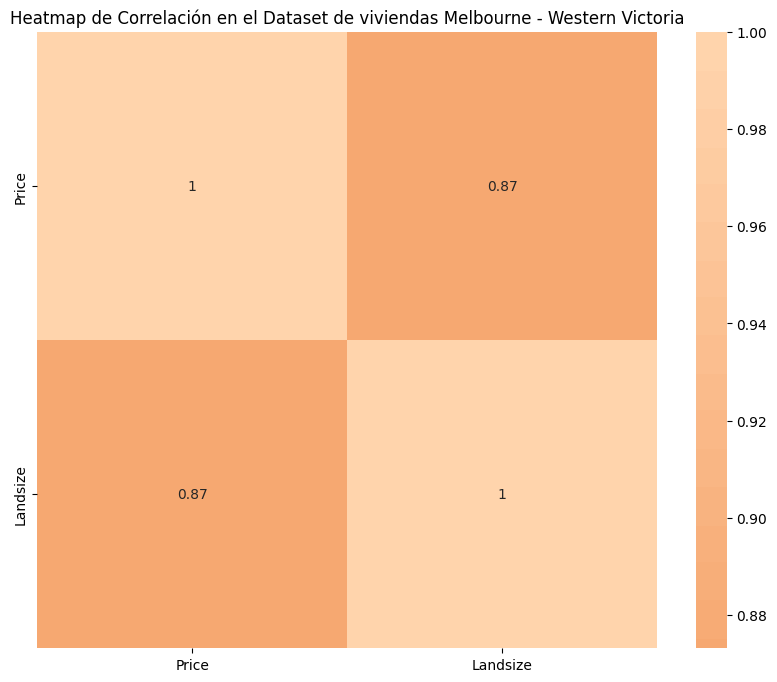

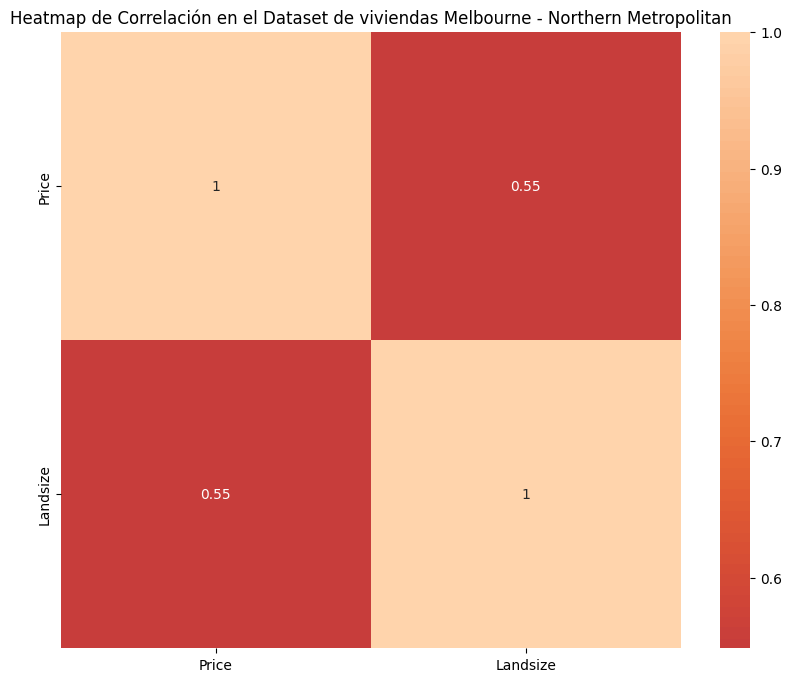

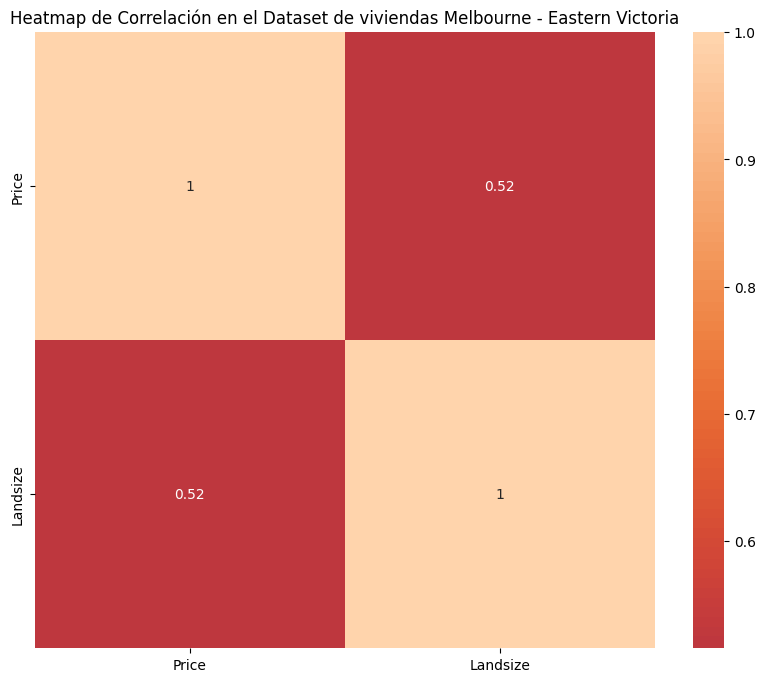

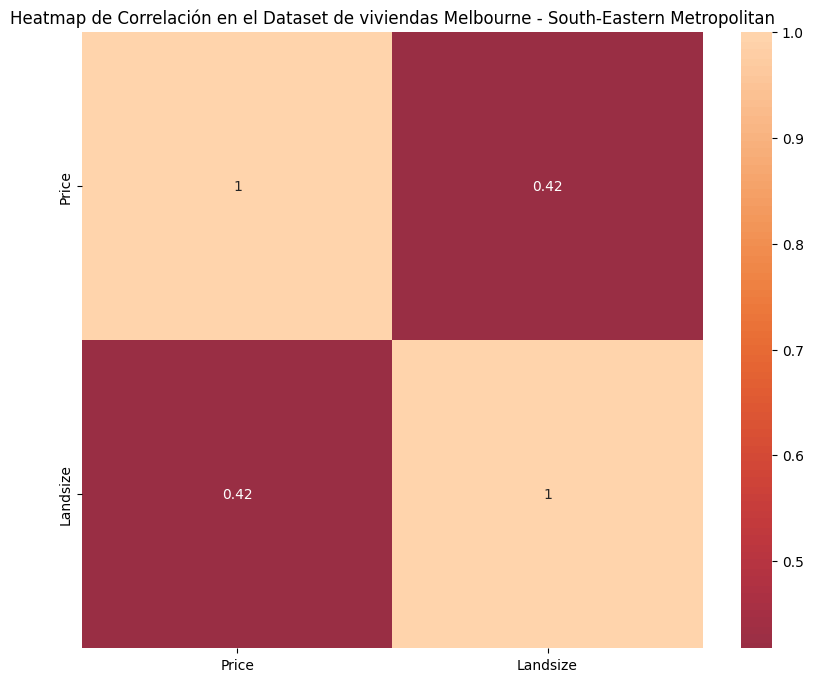

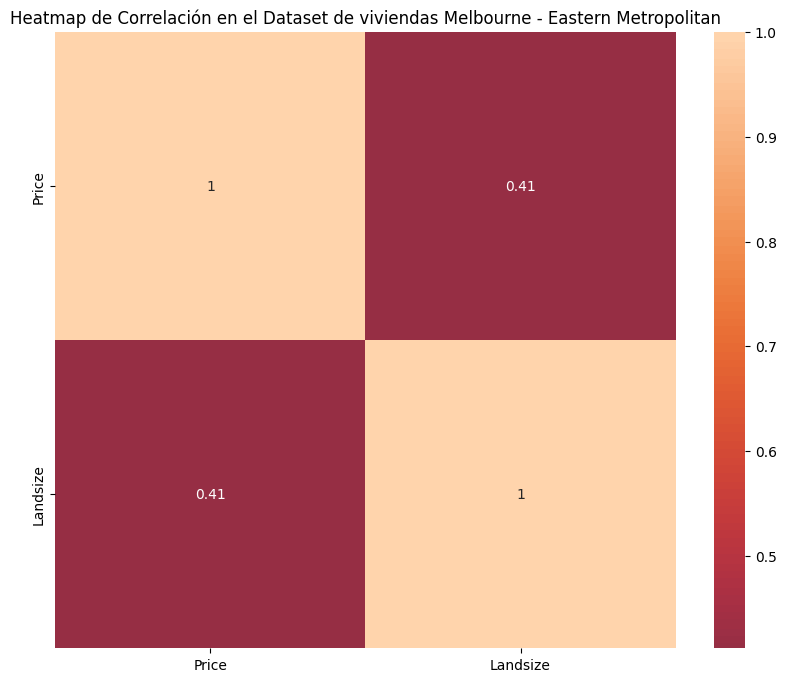

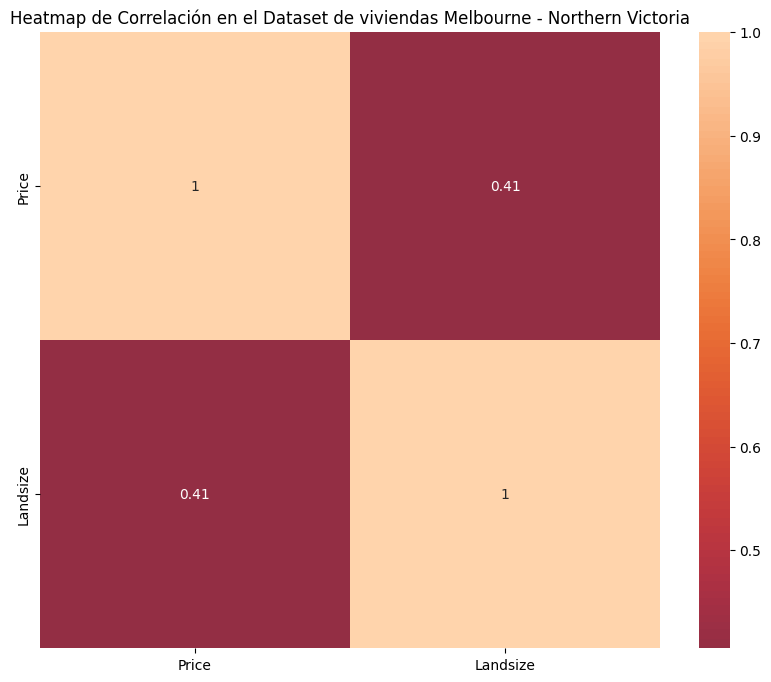

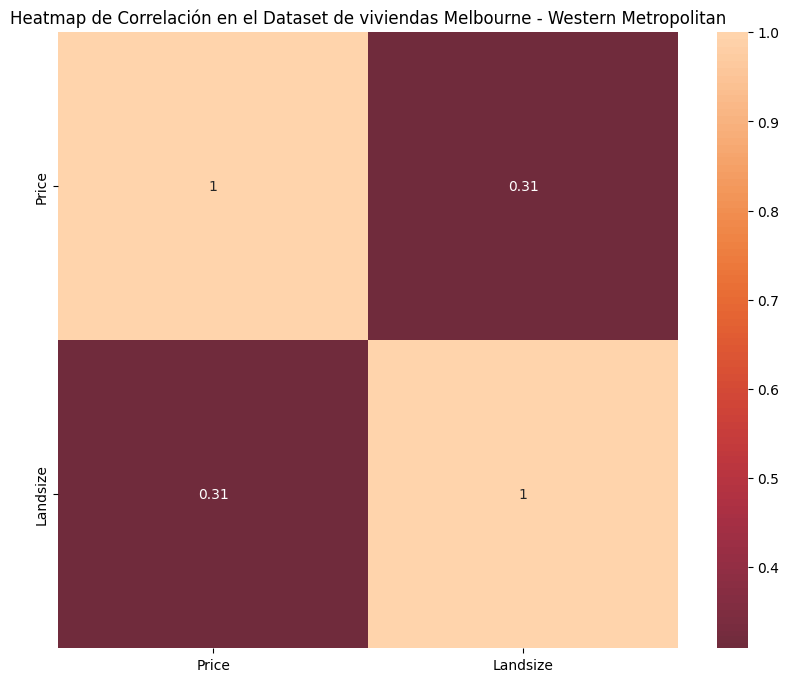

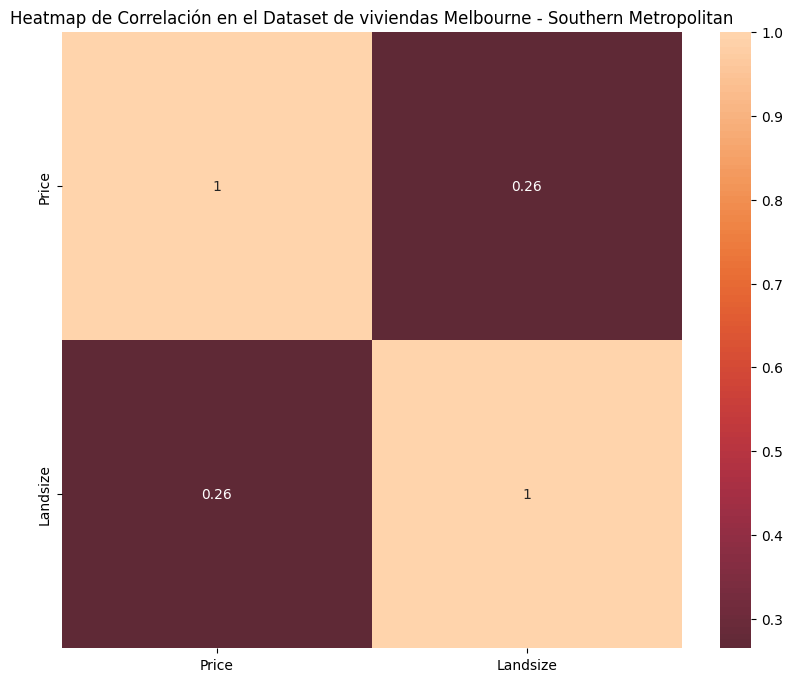

RESUMEN:
Correlación Price y Landsize en la región Western Victoria            es de 0.87
Correlación Price y Landsize en la región Northern Metropolitan       es de 0.55
Correlación Price y Landsize en la región Eastern Victoria            es de 0.52
Correlación Price y Landsize en la región South-Eastern Metropolitan  es de 0.42
Correlación Price y Landsize en la región Eastern Metropolitan        es de 0.41
Correlación Price y Landsize en la región Northern Victoria           es de 0.41
Correlación Price y Landsize en la región Western Metropolitan        es de 0.31
Correlación Price y Landsize en la región Southern Metropolitan       es de 0.26


In [51]:
# Crear un diccionario para almacenar las correlaciones
correlations = {}

#Creo una lista para almacenar las Regiones que tengan correlación menor a un mínimo deseado
Regiones_sin_corr = []
Correlacion_min = 0.5


# Calcular las correlaciones para cada región y almacenarlas en el diccionario
for i in melb_df3['Regionname'].unique():
    filtro = melb_df3.loc[melb_df3['Regionname'] == i]
    corrmat = filtro[['Price', 'Landsize']].corr()
    correlations[i] = abs(corrmat.loc['Price', 'Landsize'])

# Ordenar las regiones basándose en las correlaciones de mayor a menor
sorted_regions = sorted(correlations, key=correlations.get, reverse=True)

# Generar y mostrar los heatmaps en el orden deseado
for i in sorted_regions:
    filtro = melb_df3.loc[melb_df3['Regionname'] == i]
    corrmat = filtro[['Price', 'Landsize']].corr()

    # Crear el heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corrmat, annot=True, center=0)

    # Establecer el título del gráfico
    plt.title(f"Heatmap de Correlación en el Dataset de viviendas Melbourne - {i}")

    # Mostrar el gráfico
    plt.show()

# Resumen de resultados
print('RESUMEN:')
len_texto_mas_largo = len(max(sorted_regions, key=len))
for i in sorted_regions:
  filtro = melb_df3.loc[melb_df3['Regionname'] == i]
  # Calculo la matriz de correlación
  correlation_matrix = filtro[['Price', 'Landsize']].corr()
  # Extraer el valor de la correlación entre Price y Landsize
  correlation_price_landsize = correlation_matrix.loc['Price', 'Landsize']
  correlation_price_landsize = round(correlation_price_landsize, 2)
  # Almaceno las correlaciones que no cumplen con el mínimo
  if correlation_price_landsize < Correlacion_min:
    Regiones_sin_corr.append(i)

  #Imprimo los resultados
  print(f'Correlación Price y Landsize en la región {i.ljust(len_texto_mas_largo)}\
  es de {correlation_price_landsize}')




Hay variación en relacionar Price y Landsize por región. <br>
En Eastern Metropolitan, South-Eastern Metropolitan, Southern Metropolitan y Western Metropolitan, los errores (r) son menores a 0.4, por lo que descartaré estos datos.

In [52]:
#Quedaré únicamente con los datos a trabajar
melb_df_final = melb_df3
for i in Regiones_sin_corr:
  melb_df_final = melb_df_final.loc[melb_df_final['Regionname'] != i]

#Compruebo la lista
melb_df_final['Regionname'].unique()

array(['Eastern Victoria', 'Northern Metropolitan', 'Western Victoria'],
      dtype=object)

En cuanto al Machine Learning, dividiré las regiones y haré el análisis con cada dataset.

# **MACHINE LEARNING**

### **Agglomerative clustering**

Deseo ver las agrupaciones (aglomeraciones). Por ello, decidí utilizar el modelo de agglomerative clustering.

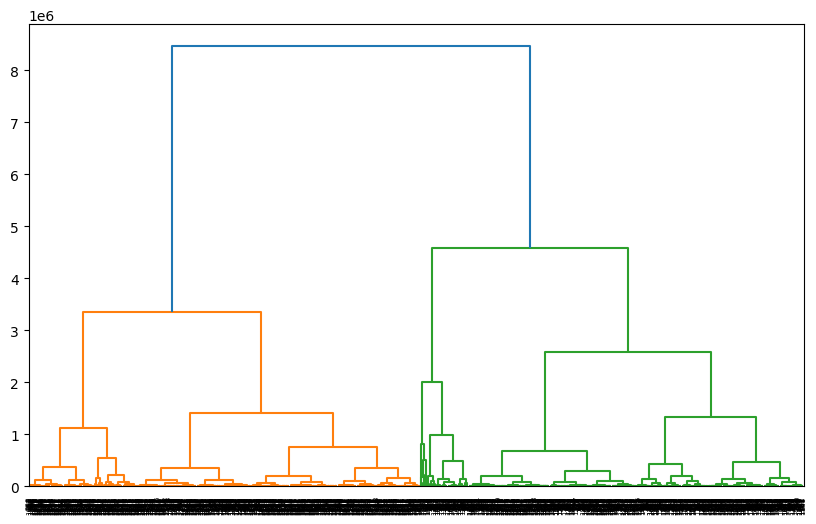

In [53]:
X = melb_df_final.loc[:, ["Price", "Landsize"]].values
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Visualizo 2 grandes grupos, por lo que dividiré en 2 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



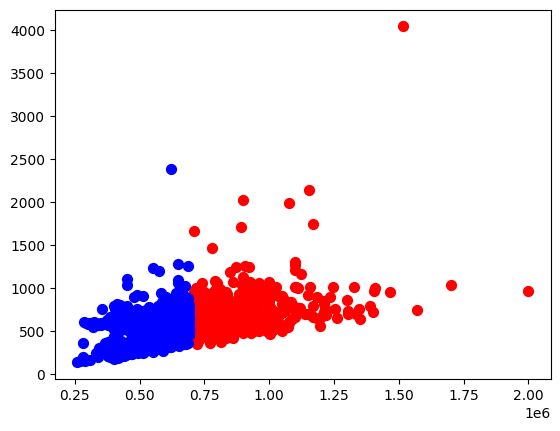

In [54]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

Se visualiza 1 grupo con pocos outliers

#### **BIRCH**

Para comprobar utilizaré el método BIRCH, que también me da aglomeraciones y buenos resultados

<function matplotlib.pyplot.show(close=None, block=None)>

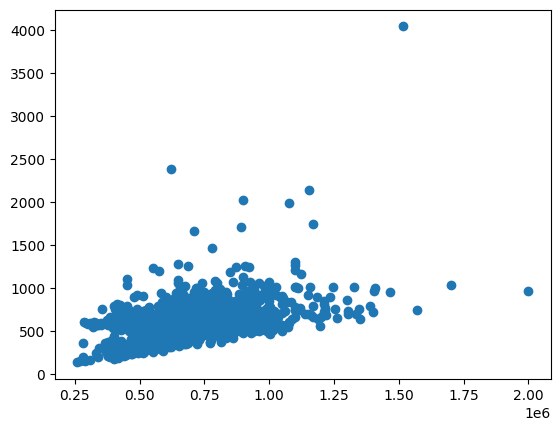

In [55]:
#Visualizar la data
plt.scatter(X[:,0], X[:,1])
plt.show

In [56]:
#Definir y ajustar metodo BRICH
bclust = Birch(branching_factor=100, n_clusters = 2, threshold=1).fit(X)

#Output de parametros BIRCH
print("Parametros BIRCH: ", bclust.get_params())

Parametros BIRCH:  {'branching_factor': 100, 'compute_labels': True, 'copy': True, 'n_clusters': 2, 'threshold': 1}


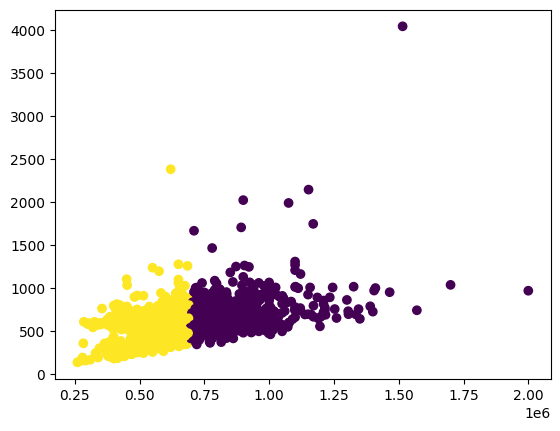

In [57]:
#Prediccion de clusters
labels = bclust.predict(X)

#Visulizar data
plt.scatter(X[:,0], X[:,1], c=labels)

Al igual que el modelo anterior, se visualiza que 1 grupo óptimo.

# **PREDICCIÓN**

Mediante el módelo lineal, hallaré la función del valor según Región (considerando la limpieza de outliers y limitantes explicadas en el trabajo).

Regiones disponibles:
0. Eastern Victoria
1. Northern Metropolitan
2. Western Victoria
Ingrese el número del índice para seleccionar la región: 1

 Has seleccionado: Northern Metropolitan 

Ingrese la distancia del CBD en km (de 9 a 48): 12.3

 Has seleccionado: 12.3km. 

Ingrese el área del terreno (en km^2): 323.2

 Precio de venta (AUD) = 544.19 x área del terreno + 388314.05

 Precio estimado 564196.14 millones AUD 

Matriz de correlación = 0.55 (Regular)


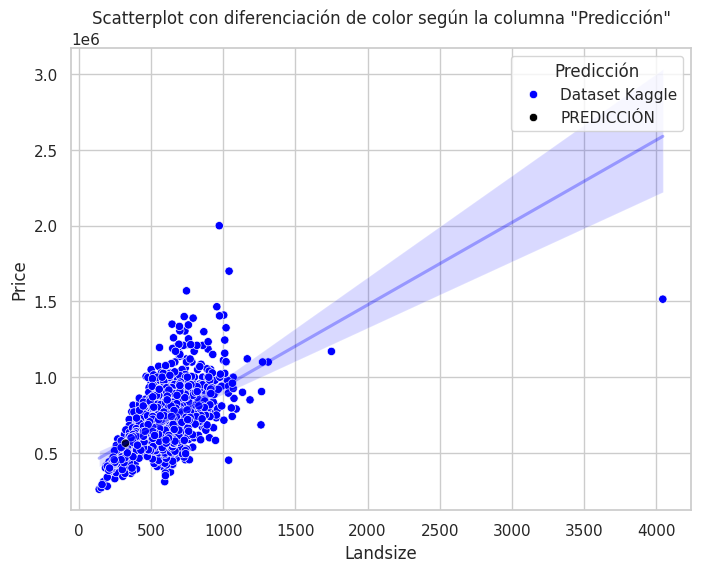


 Considerar que se realizo la limpieza de outliers y de todas las viviendas 
 que se encontraban entre 0 a 9km de distancia del CBD. 
 De la misma forma, se eliminola data de las regiones donde la relacion 
 Precio vs Área del terreno era muy mala. 
 Todo calculo se realizo sobre los datos despues de las depuraciones de su respectiva región
Se guardo el dataset filtrado (Data Northern Metropolitan filtrado.csv). Se encuntra en el entorno de ejecución,disponible para descargar.
Se guardo el dataset de la región Northern Metropolitan completa (Data Northern Metropolitan completo.csv). Se encuntra en el entorno de ejecución,disponible para descargar.


In [64]:
##INGRESO DE DATOS
#Filtrar las Regiones disponibles
Regiones_disponibles = melb_df_final['Regionname'].unique().tolist()
#Mostrar con indice
print("Regiones disponibles:")
for i, region in enumerate(Regiones_disponibles):
    print(f"{i}. {region}")
#Solicitar y mostrar al usuario la región hasta que ingrese un valor valido
while True:
    try:
        indice_seleccionado = int(input("Ingrese el número del índice para seleccionar la región: "))
        if 0 <= indice_seleccionado < len(Regiones_disponibles):
            print(f"\n Has seleccionado: {Regiones_disponibles[indice_seleccionado]} \n")
            Region = Regiones_disponibles[indice_seleccionado]
            break
        else:
            print("\n Índice inválido. Por favor, ingrese un número de índice válido.")
    except ValueError:
        print(f"\n Entrada inválida. Por favor, ingrese un número entero del 0 al {len(Regiones_disponibles)}.")


#Indicar distancia del CDB
while True:
    try:
        distancia = float(input("Ingrese la distancia del CBD en km (de 9 a 48): "))
        if 9 <= distancia < 48.1:
            print(f"\n Has seleccionado: {distancia}km. \n")
            break
        else:
            print("\n Distancia inválida. Por favor, ingrese un número válido.")
    except ValueError:
        print(f"\n Distancia inválida. Por favor, ingrese un número válido.")


#Indicar área del terreno
area_terreno = float(input("Ingrese el área del terreno (en km^2): "))

##FILTRO Y CALCULO
#Filtrar región
filtro = melb_df_final.loc[melb_df_final['Regionname'] == Region]

# Calculo la matriz de correlación
correlation_matrix = filtro[['Price', 'Landsize']].corr()
# Extraer el valor de la correlación entre Price y Landsize
correlation_price_landsize = correlation_matrix.loc['Price', 'Landsize']
correlation_price_landsize = round(correlation_price_landsize, 2)
#Calidad
if correlation_price_landsize <= 0.7:
  calidad = "Regular"
elif correlation_price_landsize <= 0.85:
  calidad = "Buena"
else:
  calidad = "Muy buena"


#Modelo de Regresion lineal
reglin = stats.linregress(x=filtro.Landsize, y = filtro.Price)
Pendiente = reglin.slope
Intercepcion = reglin.intercept

#Ecuación Y RESULTADO
print(f'\n Precio de venta (AUD) = {round(Pendiente,2)} x área del terreno + {round(Intercepcion ,2)}')
Precioventa = Pendiente*area_terreno + Intercepcion
print(f'\n Precio estimado {round(Precioventa,2)} millones AUD \n')
print(f'Matriz de correlación = {correlation_price_landsize} ({calidad})')

#Creo el DF del estimado para agregar
dato_estimado = pd.DataFrame({
  "Suburb": ["PREDICCIÓN"],
  "Address": [math.nan],
  "Rooms": [math.nan],
  "Type": [math.nan],
  "Price": [Precioventa],
  "Method": [math.nan],
  "SellerG": [math.nan],
  "Date": [math.nan],
  "Distance": [distancia],
  "Postcode": [math.nan],
  "Bedroom2": [math.nan],
  "Bathroom": [math.nan],
  "Car": [math.nan],
  "Landsize": [area_terreno],
  "BuildingArea": [math.nan],
  "YearBuilt": [math.nan],
  "CouncilArea": [math.nan],
  "Lattitude": [math.nan],
  "Longtitude": [math.nan],
  "Regionname": [Region],
  "Propertycount":  [math.nan]
})

#Agregar a DF filtrado
df = pd.concat([filtro, dato_estimado], ignore_index=True)


##Graficar
# Crear la nueva columna basada en la condición
df['Predicción'] = np.where(df['Suburb'] == 'PREDICCIÓN', 'PREDICCIÓN', 'Dataset Kaggle')
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear el scatterplot con ajuste de transparencia solo para 'Dataset Kaggle'
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Landsize', y='Price', hue='Predicción', data=df,
                          sizes=[300 if val == 'PREDICCIÓN' else 100 for val in df['Predicción']],
                          palette={'Dataset Kaggle': 'blue', 'PREDICCIÓN': 'black'})

# Añadir la línea de tendencia para 'Dataset Kaggle' con transparencia
sns.regplot(x='Landsize', y='Price', data=df[df['Predicción'] == 'Dataset Kaggle'], scatter=False, color='blue', scatter_kws={'alpha': 0.4}, line_kws={'alpha': 0.3})
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Scatterplot con diferenciación de color según la columna "Predicción"')
plt.legend(title='Predicción')
plt.grid(True)
plt.show()


##ADVERTENCIAS Y GUARDAR RESULTADOS
#Imprimir límitantes del trabajo
print(f'\n Considerar que se realizo la limpieza de outliers y de todas las viviendas \n \
que se encontraban entre 0 a 9km de distancia del CBD. \n De la misma forma, se elimino\
la data de las regiones donde la relacion \n Precio vs Área del terreno era muy mala. \n \
Todo calculo se realizo sobre los datos despues de las depuraciones de su respectiva región')


# Creo el DF con el dato al inicio
df = pd.concat([dato_estimado, filtro], ignore_index=True)
#Guardar Dataset filtrado
df.to_csv(f'Data {Region} filtrado.csv', index=False)
print(f"Se guardo el dataset filtrado (Data {Region} filtrado.csv). Se encuntra en el entorno de ejecución,disponible para descargar.")


#Crear Dataset completo de la región
df2 = pd.concat([dato_estimado, melb_df], ignore_index=True)
df2 = df2.loc[df2['Regionname'] == Region]
#Guardar Dataset completo de la región
df.to_csv(f'Data {Region} completo.csv', index=False)
print(f"Se guardo el dataset de la región {Region} completa (Data {Region} completo.csv). Se encuntra en el entorno de ejecución,disponible para descargar.")




